# CREDIT EDA CASE STUDY

The objective of this case study is to identify the driver variables which can be helpful while authorising the loans, to minimise the risk of defaults. We'll proceed with the Exploratory Data Analysis (EDA) of the available variables and get our insights to derive the driver variables from the given current and previous application data. 

### Loading libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='whitegrid')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_info_columns', 200)
pd.set_option('display.max_colwidth',-1)
pd.set_option('float_format','{:f}'.format)

## Analysis of application_data.csv

In [3]:
app_data = pd.read_csv('application_data.csv')
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000000,406597.500000,24700.500000,351000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.000000,-2120,nan,1,1,0,1,1,0,Laborers,1.000000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.024700,0.036900,0.972200,0.619200,0.014300,0.000000,0.069000,0.083300,0.125000,0.036900,0.020200,0.019000,0.000000,0.000000,0.025200,0.038300,0.972200,0.634100,0.014400,0.000000,0.069000,0.083300,0.125000,0.037700,0.022000,0.019800,0.000000,0.000000,0.025000,0.036900,0.972200,0.624300,0.014400,0.000000,0.069000,0.083300,0.125000,0.037500,0.020500,0.019300,0.000000,0.000000,reg oper account,block of flats,0.014900,"Stone, brick",No,2.000000,2.000000,2.000000,2.000000,-1134.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,1129500.000000,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.000000,-291,nan,1,1,0,1,1,0,Core staff,2.000000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,nan,0.095900,0.052900,0.985100,0.796000,0.060500,0.080000,0.034500,0.291700,0.333300,0.013000,0.077300,0.054900,0.003900,0.009800,0.092400,0.053800,0.985100,0.804000,0.049700,0.080600,0.034500,0.291700,0.333300,0.012800,0.079000,0.055400,0.000000,0.000000,0.096800,0.052900,0.985100,0.798700,0.060800,0.080000,0.034500,0.291700,0.333300,0.013200,0.078700,0.055800,0.003900,0.010000,reg oper account,block of flats,0.071400,Block,No,1.000000,0.000000,1.000000,0.000000,-828.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,675

### Routine Checks

In [4]:
# Finding the number of rows and columns in the dataset
app_data.shape

(307511, 122)

In [5]:
print('The dataset consists of %d rows and %d columns.' %(app_data.shape[0],app_data.shape[1]))

The dataset consists of 307511 rows and 122 columns.


In [6]:
# Finding the names of columns present in the dataset
app_data.columns.to_list()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [7]:
# Finding the description of columns in the dataset
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

In [8]:
# Finding the data types of variables present in the dataset
app_data.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

From this we can see that 16 variables are categorical variables and the rest are numerical variables.
But, there are some categorical variables, such as flags which are expressed in numerical terms using 0s and 1s. Hence, they need to be treated before analysis.

In [9]:
# Finding the size, count and number of unique values of all columns of the dataset
app_data.agg(['size','count','nunique'])

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
size,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511
count,307511,307511,307511,307511,307511,307511,307511,307511,307511,307499,307233,306219,307511,307511,307511,307511,307511,307511,307511,307511,307511,104582,307511,307511,307511,307511,307511,307511,211120,307509,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,134133,306851,246546,151450,127568,157504,103023,92646,143620,152683,154491,98869,124921,97312,153161,93997,137829,151450,127568,157504,103023,92646,143620,152683,154491,98869,124921,97312,153161,93997,137829,151450,127568,157504,103023,92646,143620,152683,154491,98869,124921,97312,153161,93997,137829,97216,153214,159080,151170,161756,306490,306490,306490,306490,307510,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,265992,265992,265992,265992,265992,265992
nunique,307511,2,2,3,2,2,15,2548,5603,13672,1002,7,8,5,6,6,81,17460,12574,15688,6168,62,2,2,

In [10]:
# Finding the distribution of numerical variables
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307499.000000,307233.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,306851.000000,246546.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,168797.919297,599025.999706,27108.573909,538396.207429,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,0.514393,0.510853,0.117440,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.08795

In [11]:
# Finding the null values in the columns of the data
app_data.isnull().sum()

SK_ID_CURR                      0     
TARGET                          0     
NAME_CONTRACT_TYPE              0     
CODE_GENDER                     0     
FLAG_OWN_CAR                    0     
FLAG_OWN_REALTY                 0     
CNT_CHILDREN                    0     
AMT_INCOME_TOTAL                0     
AMT_CREDIT                      0     
AMT_ANNUITY                     12    
AMT_GOODS_PRICE                 278   
NAME_TYPE_SUITE                 1292  
NAME_INCOME_TYPE                0     
NAME_EDUCATION_TYPE             0     
NAME_FAMILY_STATUS              0     
NAME_HOUSING_TYPE               0     
REGION_POPULATION_RELATIVE      0     
DAYS_BIRTH                      0     
DAYS_EMPLOYED                   0     
DAYS_REGISTRATION               0     
DAYS_ID_PUBLISH                 0     
OWN_CAR_AGE                     202929
FLAG_MOBIL                      0     
FLAG_EMP_PHONE                  0     
FLAG_WORK_PHONE                 0     
FLAG_CONT_MOBILE         

### Checking and dropping columns with high number of null values

In [12]:
# Function to identify attributes of the dataframe like null values, unique values and data types.
def df_attr(df):
    count = df.count()
    null = df.isnull().sum()
    null_perc = round(df.isnull().sum()/df.shape[0]*100,4)
    unique = df.nunique()
    types = df.dtypes
    return pd.concat([count, null, null_perc, unique, types], axis = 1, 
                     keys=['COUNT','NULL','PERCENT','NUM_UNIQUE','DATATYPE']).sort_values(by='PERCENT',ascending=False)

In [13]:
app_data_attr = df_attr(app_data)
app_data_attr.style.background_gradient(cmap='Reds',subset=['NULL','PERCENT'])

,COUNT,NULL,PERCENT,NUM_UNIQUE,DATATYPE
COMMONAREA_MEDI,92646,214865,69.872300,3202,float64
COMMONAREA_AVG,92646,214865,69.872300,3181,float64
COMMONAREA_MODE,92646,214865,69.872300,3128,float64
NONLIVINGAPARTMENTS_MODE,93997,213514,69.433000,167,float64
NONLIVINGAPARTMENTS_AVG,93997,213514,69.433000,386,float64
NONLIVINGAPARTMENTS_MEDI,93997,213514,69.433000,214,float64
FONDKAPREMONT_MODE,97216,210295,68.386200,4,object
LIVINGAPARTMENTS_MODE,97312,210199,68.355000,736,float64
LIVINGAPARTMENTS_AVG,97312,210199,68.355000,1868,float64
LIVINGAPARTMENTS_MEDI,97312,210199,68.355000,1097,float64


Let us find the columns which have null percentage more than 45%.

In [14]:
# Finding the columns with null percentage > 45%
app_data_attr.loc[app_data_attr.PERCENT > 45]

,COUNT,NULL,PERCENT,NUM_UNIQUE,DATATYPE
COMMONAREA_MEDI,92646,214865,69.872300,3202,float64
COMMONAREA_AVG,92646,214865,69.872300,3181,float64
COMMONAREA_MODE,92646,214865,69.872300,3128,float64
NONLIVINGAPARTMENTS_MODE,93997,213514,69.433000,167,float64
NONLIVINGAPARTMENTS_AVG,93997,213514,69.433000,386,float64
NONLIVINGAPARTMENTS_MEDI,93997,213514,69.433000,214,float64
FONDKAPREMONT_MODE,97216,210295,68.386200,4,object
LIVINGAPARTMENTS_MODE,97312,210199,68.355000,736,float64
LIVINGAPARTMENTS_AVG,97312,210199,68.355000,1868,float64
LIVINGAPARTMENTS_MEDI,97312,210199,68.355000,1097,float64


We can see from this there are almost 50 columns which have null percentage over 45%.

**We'll remove these columns with high null values, as it will be difficult to carry on analysis with this much amount of null values and also no proper values can be imputed in their places.**

In [15]:
# Dropping the columns with high null percentage
drop_cols = list(app_data_attr.loc[app_data_attr.PERCENT > 45].index)
app_data.drop(drop_cols, axis=1, inplace=True)

In [16]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000000,406597.500000,24700.500000,351000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.000000,-2120,1,1,0,1,1,0,Laborers,1.000000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.000000,2.000000,2.000000,2.000000,-1134.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,1129500.000000,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.000000,-291,1,1,0,1,1,0,Core staff,2.000000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,nan,1.000000,0.000000,1.000000,0.000000,-828.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,67500.000000,135000.000000,6750.000000,135000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.000000,-2531,1,1,1,1,1,0,Laborers,1.000000,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.000000,0.000000,0.000000,0.000000,-815.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,100006,0,Cash loans,F,N,Y,0,135000.000000,312682.500000,29686.500000,297000.000000,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.000000,-2437,1,1,0,1,0,0,Laborers,2.000000,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,nan,2.000000,0.000000,2.000000,0.000000,-617.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan,nan,nan
4,100007,0,Cash loans,M,N,Y,0,121500.000000,513000.000000,21865.500000,513000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.000000,-3458,1,1,0,1,0,0,Core staff,1.000000,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,nan,0.000000,0.000000,0.000000,0.000000,-1106.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [17]:
app_data.shape

(307511, 73)

After dropping the columns with high null percentage, we are left with 73 columns having less or no null values.

In [18]:
# Checking the attributes of dataset after dropping the columns with high null percentage
app_data_attr = df_attr(app_data)
app_data_attr

,COUNT,NULL,PERCENT,NUM_UNIQUE,DATATYPE
OCCUPATION_TYPE,211120,96391,31.345500,18,object
EXT_SOURCE_3,246546,60965,19.825300,814,float64
AMT_REQ_CREDIT_BUREAU_YEAR,265992,41519,13.501600,25,float64
AMT_REQ_CREDIT_BUREAU_QRT,265992,41519,13.501600,11,float64
AMT_REQ_CREDIT_BUREAU_MON,265992,41519,13.501600,24,float64
AMT_REQ_CREDIT_BUREAU_WEEK,265992,41519,13.501600,9,float64
AMT_REQ_CREDIT_BUREAU_DAY,265992,41519,13.501600,9,float64
AMT_REQ_CREDIT_BUREAU_HOUR,265992,41519,13.501600,5,float64
NAME_TYPE_SUITE,306219,1292,0.420100,7,object
OBS_30_CNT_SOCIAL_CIRCLE,306490,1021,0.332000,33,float64


### Checking columns with very less null values

_For this we'll consider the columns with null value percentage in the range 0 and 15_

In [19]:
# Finding the attribute of columns with very less null values
low_null = app_data_attr[(app_data_attr.PERCENT > 0) & (app_data_attr.PERCENT < 15)]
low_null

,COUNT,NULL,PERCENT,NUM_UNIQUE,DATATYPE
AMT_REQ_CREDIT_BUREAU_YEAR,265992,41519,13.501600,25,float64
AMT_REQ_CREDIT_BUREAU_QRT,265992,41519,13.501600,11,float64
AMT_REQ_CREDIT_BUREAU_MON,265992,41519,13.501600,24,float64
AMT_REQ_CREDIT_BUREAU_WEEK,265992,41519,13.501600,9,float64
AMT_REQ_CREDIT_BUREAU_DAY,265992,41519,13.501600,9,float64
AMT_REQ_CREDIT_BUREAU_HOUR,265992,41519,13.501600,5,float64
NAME_TYPE_SUITE,306219,1292,0.420100,7,object
OBS_30_CNT_SOCIAL_CIRCLE,306490,1021,0.332000,33,float64
DEF_30_CNT_SOCIAL_CIRCLE,306490,1021,0.332000,10,float64
OBS_60_CNT_SOCIAL_CIRCLE,306490,1021,0.332000,33,float64


#### NAME_TYPE_SUITE
**This is a categorical column and hence the missing values can be filled with the mode i.e., Unaccompanied**

In [20]:
app_data.NAME_TYPE_SUITE.mode()

0    Unaccompanied
dtype: object

#### Number of Enquiries
The below columns represent the number of enquiries made at certain time period before the application. We come to know that these columns consists of same number of null values (41519):
- AMT_REQ_CREDIT_BUREAU_HOUR
- AMT_REQ_CREDIT_BUREAU_DAY
- AMT_REQ_CREDIT_BUREAU_WEEK
- AMT_REQ_CREDIT_BUREAU_MON
- AMT_REQ_CREDIT_BUREAU_QRT
- AMT_REQ_CREDIT_BUREAU_YEAR

In [21]:
enq = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
          'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [22]:
app_data[enq].describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


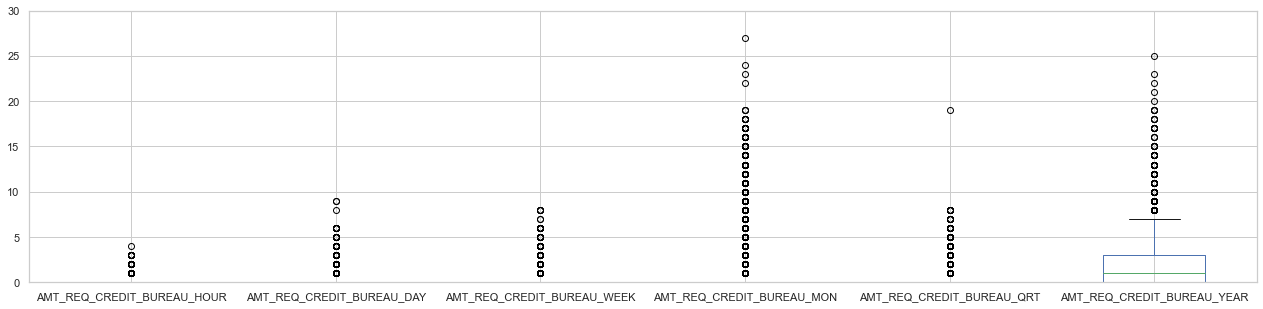

In [23]:
app_data[enq].plot.box(figsize=(22,5))
plt.ylim(0,30)
plt.show()

From the box plots, it is evident that outliers are present for the values in these columns.

**So, we should impute the value of median in the place of null values assuming that no previous enquiries were made.**

Median for all the above columns turns out to be 0 except that for the year, where the median is 1.

#### Social Surrounding Count
The following columns have over 1000 null values each and give information about the defaulting nature of the client's social surroundings:
- OBS_30_CNT_SOCIAL_CIRCLE
- DEF_30_CNT_SOCIAL_CIRCLE
- OBS_60_CNT_SOCIAL_CIRCLE
- DEF_60_CNT_SOCIAL_CIRCLE

In [24]:
soc = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']
app_data[soc].describe()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
count,306490.000000,306490.000000,306490.000000,306490.000000
mean,1.422245,0.143421,1.405292,0.100049
std,2.400989,0.446698,2.379803,0.362291
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,0.000000
max,348.000000,34.000000,344.000000,24.000000


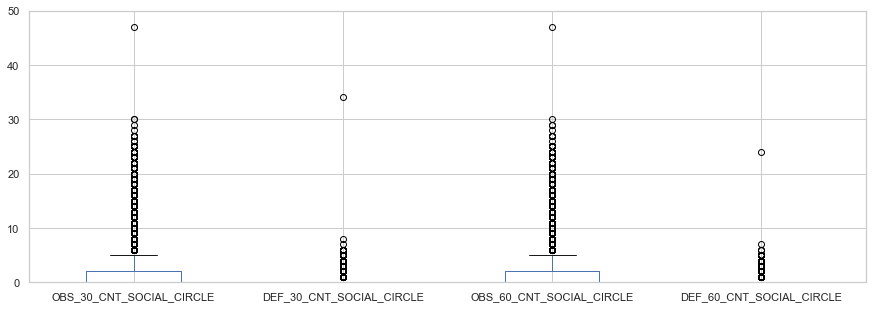

In [25]:
app_data[soc].plot.box(figsize=(15,5))
plt.ylim(0,50)
plt.show()

**By analysing the data present in these columns, we come to know that outliers are present in these columns and hence, median should be imputed to the null values.** In this case the median of these columns turns out to be 0.

#### EXT_SOURCE_2
**This variable does not have any outliers and the null places can be imputed with the mean value.**

In [26]:
app_data.EXT_SOURCE_2.describe()

count   306851.000000
mean    0.514393     
std     0.191060     
min     0.000000     
25%     0.392457     
50%     0.565961     
75%     0.663617     
max     0.855000     
Name: EXT_SOURCE_2, dtype: float64

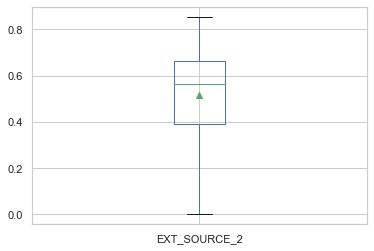

In [27]:
app_data.EXT_SOURCE_2.plot.box(showmeans=True)
plt.show()

#### AMT_GOODS_PRICE

**The column AMT_GOODS_PRICE have outliers present in its distribution and hence, median (450000) needs to be imputed in place of the null values.**

In [28]:
app_data.AMT_GOODS_PRICE.describe()

count   307233.000000 
mean    538396.207429 
std     369446.460540 
min     40500.000000  
25%     238500.000000 
50%     450000.000000 
75%     679500.000000 
max     4050000.000000
Name: AMT_GOODS_PRICE, dtype: float64

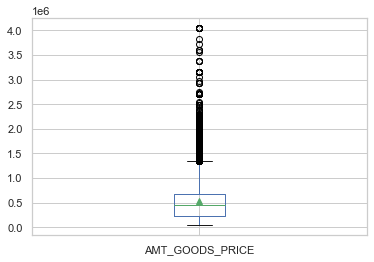

In [29]:
app_data.AMT_GOODS_PRICE.plot.box(showmeans=True)
plt.show()

- AMT_ANNUITY
- CNT_FAM_MEMBERS
- DAYS_LAST_PHONE_CHANGE

The above columns can be imputed with median as these values have outliers present in them. They may also be left as it is because the scale of missing values is very small compared to the size of the data.

**For carrying out further analysis, we will take a subset of the given data having only significant columns which will help us at getting meaningful insights. The columns are chosen based on our understanding of their description and their attributes.**

In [30]:
cols_to_keep = ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 
                'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 
                'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 
                'EXT_SOURCE_2', 'EXT_SOURCE_3']

In [31]:
# Taking subset of the actual data
app = app_data[cols_to_keep]
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3
0,100002,1,Cash loans,M,N,Y,202500.000000,406597.500000,24700.500000,351000.000000,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,Laborers,1.000000,2,2,0,0,0,Business Entity Type 3,0.262949,0.139376
1,100003,0,Cash loans,F,N,N,270000.000000,1293502.500000,35698.500000,1129500.000000,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,Core staff,2.000000,1,1,0,0,0,School,0.622246,nan
2,100004,0,Revolving loans,M,Y,Y,67500.000000,135000.000000,6750.000000,135000.000000,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,Laborers,1.000000,2,2,0,0,0,Government,0.555912,0.729567
3,100006,0,Cash loans,F,N,Y,135000.000000,312682.500000,29686.500000,297000.000000,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,Laborers,2.000000,2,2,0,0,0,Business Entity Type 3,0.650442,nan
4,100007,0,Cash loans,M,N,Y,121500.000000,513000.000000,21865.500000,513000.000000,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,Core staff,1.000000,2,2,0,1,1,Religion,0.322738,nan


In [32]:
# Checking the shape of the subset dataframe
app.shape

(307511, 27)

In [33]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   AMT_ANNUITY                  307499 non-null  float64
 9   AMT_GOODS_PRICE              307233 non-null  float64
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 13 

In [34]:
app.describe()

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3
count,307511.000000,307511.000000,307511.000000,307511.000000,307499.000000,307233.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,306851.000000,246546.000000
mean,278180.518577,0.080729,168797.919297,599025.999706,27108.573909,538396.207429,0.020868,-16036.995067,63815.045904,2.152665,2.052463,2.031521,0.078173,0.230454,0.179555,0.514393,0.510853
std,102790.175348,0.272419,237123.146279,402490.776996,14493.737315,369446.460540,0.013831,4363.988632,141275.766519,0.910682,0.509034,0.502737,0.268444,0.421124,0.383817,0.191060,0.194844
min,100002.000000,0.000000,25650.000000,45000.000000,1615.500000,40500.000000,0.000290,-25229.000000,-17912.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000527
25%,189145.500000,0.000000,112500.000000,270000.000000,16524.000000,238500.000000,0.010006,-19682.000000,-2760.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.392457,0.370650
50%,278202.000000,0.000000,147150.000000,513531.000000,24903.000000,450000.000000,0.018850,-15750.000000,-1213.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.565961,0.535276
75%,367142.500000,0.000000,202500.000000,808650.000000,34596.000000,679500.000000,0.028663,-12413.000000,-289.000000,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.663617,0.669057
max,456255.000000,1.000000,117000000.000000,4050000.000000,258025.500000,4050000.000000,0.072508,-7489.000000,365243.000000,20.000000,3.000000,3.000000,1.000000,1.000000,1.000000,0.855000,0.896010


### Checking the datatypes of the columns

In [35]:
app_attr = df_attr(app)
app_attr

,COUNT,NULL,PERCENT,NUM_UNIQUE,DATATYPE
OCCUPATION_TYPE,211120,96391,31.345500,18,object
EXT_SOURCE_3,246546,60965,19.825300,814,float64
EXT_SOURCE_2,306851,660,0.214600,119831,float64
AMT_GOODS_PRICE,307233,278,0.090400,1002,float64
AMT_ANNUITY,307499,12,0.003900,13672,float64
CNT_FAM_MEMBERS,307509,2,0.000700,17,float64
DAYS_BIRTH,307511,0,0.000000,17460,int64
ORGANIZATION_TYPE,307511,0,0.000000,58,object
LIVE_CITY_NOT_WORK_CITY,307511,0,0.000000,2,int64
REG_CITY_NOT_WORK_CITY,307511,0,0.000000,2,int64


In [36]:
app.dtypes.value_counts()

object     10
int64      9 
float64    8 
dtype: int64

**From the above table, we can see some of the columns have very less unique values and have the datatype as int64. This needs to be changed to object datatype.** We'll first identify the necessary columns.

In [37]:
conv_cols_2 = list(app_attr[(app_attr.NUM_UNIQUE == 2) & (app_attr.DATATYPE == 'int64')].index)
print(conv_cols_2)

['LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY', 'TARGET']


In [38]:
# Replacing the 0s & 1s in the conv_cols with 'N' & 'Y'
for col in conv_cols_2:
    app.loc[:,col].replace((0,1), ('N','Y'), inplace=True)

The bank rates the region where the client lives which are expressed in the columns - REGION_RATING_CLIENT and REGION_RATING_CLIENT_W_CITY. These columns are of int64 datatype and has only 3 unique values.

In [39]:
conv_cols_3 = list(app_attr[(app_attr.NUM_UNIQUE == 3) & (app_attr.DATATYPE == 'int64')].index)
print(conv_cols_3)

['REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT']


In [40]:
for col in conv_cols_3:
    app[col] = app[col].astype(str)

In [41]:
app.dtypes

SK_ID_CURR                     int64  
TARGET                         object 
NAME_CONTRACT_TYPE             object 
CODE_GENDER                    object 
FLAG_OWN_CAR                   object 
FLAG_OWN_REALTY                object 
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_INCOME_TYPE               object 
NAME_EDUCATION_TYPE            object 
NAME_FAMILY_STATUS             object 
NAME_HOUSING_TYPE              object 
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                     int64  
DAYS_EMPLOYED                  int64  
OCCUPATION_TYPE                object 
CNT_FAM_MEMBERS                float64
REGION_RATING_CLIENT           object 
REGION_RATING_CLIENT_W_CITY    object 
REG_CITY_NOT_LIVE_CITY         object 
REG_CITY_NOT_WORK_CITY         object 
LIVE_CITY_NOT_WORK_CITY        object 
ORGANIZATION_TYPE              object 
EXT_SOURCE_2             

In [42]:
app.dtypes.value_counts()

object     16
float64    8 
int64      3 
dtype: int64

The necessary changes have been made to the datatypes. 
**Now we'll see the columns for different variable types.**

In [43]:
# Categorical variables
app.select_dtypes('object').columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE'],
      dtype='object')

In [44]:
# Numerical variables
app.select_dtypes(['int64','float64']).columns

Index(['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3'],
      dtype='object')

### Finding and treating outliers

_We'll check for the presence of outliers in the numerical variables and cap the outliers._

There are 3 popular methods to treat the outliers in the data that are as follows:
1. Z score method
2. IQR method
3. Percentile method

For our analysis, we are using **Percentile method** to treat the outliers.

We'll take the following columns for our outlier treatment:
- AMT_INCOME_TOTAL
- AMT_CREDIT
- AMT_ANNUITY
- AMT_GOODS_PRICE

In [45]:
#Checking the quantile distribution of the above variables
app[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']].quantile([0,0.10,0.25,0.50,0.75,0.90,0.99,1])

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
0.000000,25650.000000,45000.000000,1615.500000,40500.000000
0.100000,81000.000000,180000.000000,11074.500000,180000.000000
0.250000,112500.000000,270000.000000,16524.000000,238500.000000
0.500000,147150.000000,513531.000000,24903.000000,450000.000000
0.750000,202500.000000,808650.000000,34596.000000,679500.000000
0.900000,270000.000000,1133748.000000,45954.000000,1093500.000000
0.990000,472500.000000,1854000.000000,70006.500000,1800000.000000
1.000000,117000000.000000,4050000.000000,258025.500000,4050000.000000


**By analysing the quantile distribution, we can see that the values are more or less uniformly distributed till the 99th percentile. Hence, we'll cap the value of the variables at 99th percentile.**

In [46]:
# Defining a function to remove outliers present over a particular percentile (by default it is 99 percentile)
def remove_outliers(col, perc=99):
    f, (ax1,ax2) = plt.subplots(ncols=2, figsize=(11,5))
    plt.subplots_adjust(wspace=0.4)
    sns.boxplot(y=app[col], ax=ax1)
    ax1.set_title('''Distribution of %s \n before removing outliers''' %(col))

    o = sum(app[col] < np.nanpercentile(app[col],perc))
    l = app[col].shape[0]
    app[col] = app.loc[(app[col] < np.nanpercentile(app[col],perc)), col]
    print('%d outliers removed from %s.' %((l-o),col))
    
    sns.boxplot(y=app[col], ax=ax2)
    ax2.set_title('''Distribution of %s \n after removing outliers''' %(col))
    plt.show()

The above function removes the outliers over 99 percentile and plots the boxplots of the variable before and after the removal of the outliers.

3094 outliers removed from AMT_INCOME_TOTAL.


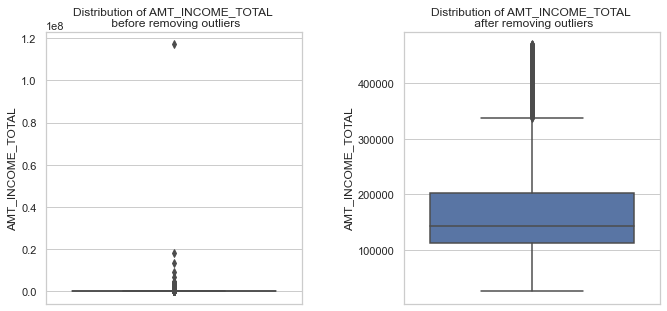

In [47]:
remove_outliers('AMT_INCOME_TOTAL')

3077 outliers removed from AMT_CREDIT.


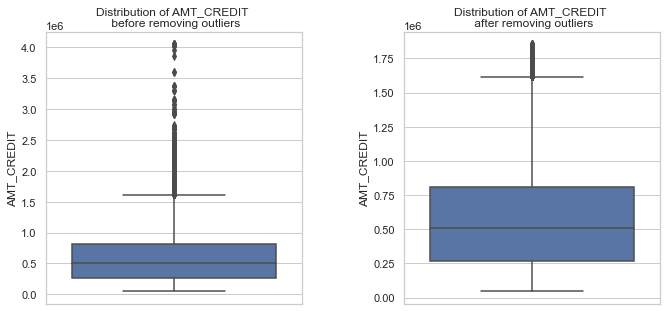

In [48]:
remove_outliers('AMT_CREDIT')

3093 outliers removed from AMT_ANNUITY.


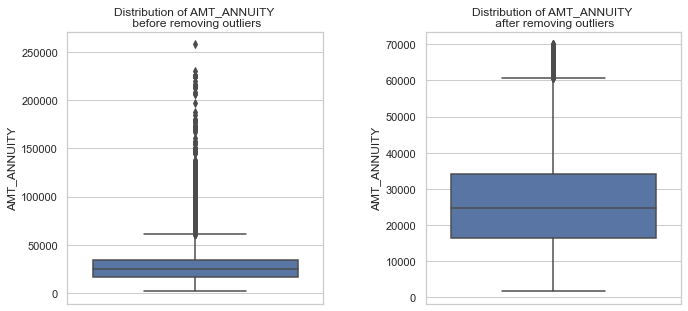

In [49]:
remove_outliers('AMT_ANNUITY')

3855 outliers removed from AMT_GOODS_PRICE.


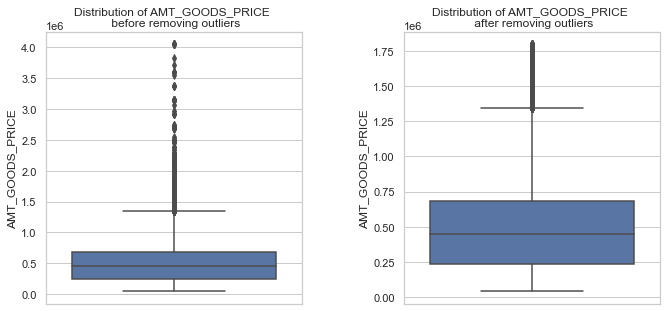

In [50]:
remove_outliers('AMT_GOODS_PRICE')

**From the graphs, we can see after the removal of some outliers**

In [51]:
app[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']].describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
count,304417.000000,304434.000000,304418.000000,303656.000000
mean,162911.014841,583440.294049,26498.619144,521732.403485
std,77494.004409,372396.914382,13032.387753,336909.343789
min,25650.000000,45000.000000,1615.500000,40500.000000
25%,112500.000000,270000.000000,16456.500000,238500.000000
50%,144000.000000,508495.500000,24745.500000,450000.000000
75%,202500.000000,808650.000000,34182.000000,679500.000000
max,469800.000000,1852807.500000,69988.500000,1795500.000000


### Binning of continuous variables

The age in this dataset is represented in terms of days in the DAYS_BIRTH column. We'll derive YEARS_BIRTH column from this for easier analysis. 

#### Age of the client

In [52]:
# Creating a new column with age in terms of years
app['YEARS_BIRTH'] = round(abs(app['DAYS_BIRTH'])/365,2)

In [53]:
app.YEARS_BIRTH.describe()

count   307511.000000
mean    43.936976    
std     11.956135    
min     20.520000    
25%     34.010000    
50%     43.150000    
75%     53.920000    
max     69.120000    
Name: YEARS_BIRTH, dtype: float64

In [54]:
app.YEARS_BIRTH.nunique()

4805

The unique values in this column is quite high and hence we'll bin these age values to 10 age groups starting from 20-25 to 65-70.

In [55]:
# Binning the values of ages
app['YEARS_BINNED'] = pd.cut(app.YEARS_BIRTH, bins = np.linspace(20,70,num=11))

In [56]:
app.YEARS_BINNED.value_counts()

(35.0, 40.0]    42861
(40.0, 45.0]    41396
(30.0, 35.0]    39455
(45.0, 50.0]    35130
(50.0, 55.0]    34952
(55.0, 60.0]    33114
(25.0, 30.0]    32866
(60.0, 65.0]    27476
(20.0, 25.0]    12175
(65.0, 70.0]    8086 
Name: YEARS_BINNED, dtype: int64

In [57]:
app['AGE_GROUP'] = pd.cut(app.YEARS_BIRTH, bins = np.linspace(20,70,num=11), 
                          labels=['20-25','25-30','30-35','35-40','40-45','45-50','50-55','55-60','60-65','65-70'])

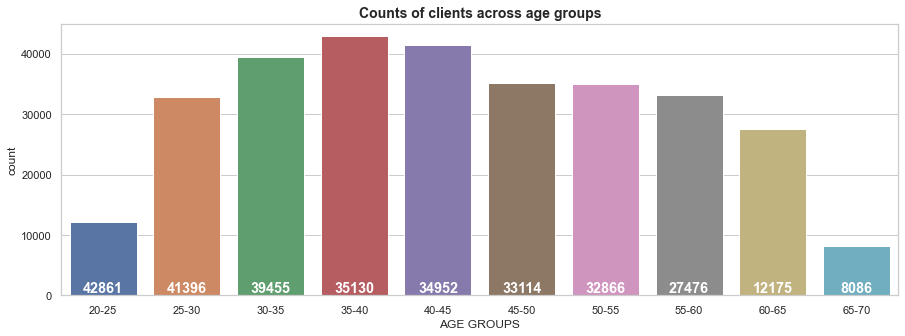

In [58]:
plt.figure(figsize=(15,5))
sns.countplot(app.AGE_GROUP)
plt.title('Counts of clients across age groups', fontsize=14, weight='bold')
plt.xlabel('AGE GROUPS')
x = list(app.AGE_GROUP.value_counts())
for i, v in enumerate(x):
    plt.text(i, v/x[i], x[i], fontsize='large', ha='center', va='bottom', weight='bold', color='W')
plt.show()

From the above plot, we can see that majority of the clients are in range of 25 to 50. And the very young (<25) and very old (>65) clients count is very less compared to other age groups.

#### Income of the client

In [59]:
# Binning the values based on the income of the individual
app['INCOME_BINNED'] = pd.cut(app.AMT_INCOME_TOTAL, bins=[25000,100000,200000,300000,400000,500000])

In [60]:
app['INCOME_BINNED'].value_counts()

(100000, 200000]    155898
(200000, 300000]    65176 
(25000, 100000]     63698 
(300000, 400000]    14676 
(400000, 500000]    4969  
Name: INCOME_BINNED, dtype: int64

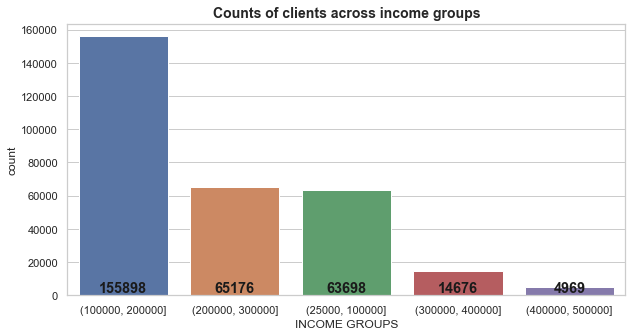

In [61]:
plt.figure(figsize=(10,5))
sns.countplot(app.INCOME_BINNED, order=app.INCOME_BINNED.value_counts().index)
plt.title('Counts of clients across income groups', fontsize=14, weight='bold')
plt.xlabel('INCOME GROUPS')
x = list(app.INCOME_BINNED.value_counts())
for i, v in enumerate(x):
    plt.text(i, v/x[i], x[i], fontsize='large', ha='center', va='bottom', weight='bold', color='k')
plt.show()

From the above graph, we can infer that majority of the clients fall in the income range of 100000 and 200000.

### Finding the data imbalance

#### Checking the distribution of TARGET variable

From the given dataset, we can understand that the clients with TARGET='Y' are defaulters and TARGET='N' are people who are non-defaulters.

In [62]:
app.TARGET.value_counts()

N    282686
Y    24825 
Name: TARGET, dtype: int64

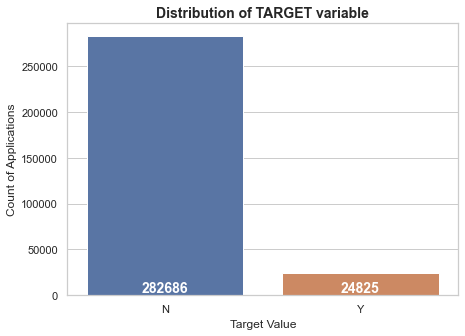

In [63]:
plt.figure(figsize=(7,5))
sns.countplot(app['TARGET'], order=app.TARGET.value_counts().index)
plt.title('Distribution of TARGET variable', fontsize=14, weight='bold')
plt.xlabel('Target Value')
plt.ylabel('Count of Applications')
x = list(app.TARGET.value_counts())
for i, v in enumerate(x):
    plt.text(i, v/x[i], x[i], fontsize=14, ha='center', va='bottom', weight='bold', color='W')
plt.show()

From the above plot, we can infer that more than 2,50,000 applicants are without payment difficulties and only around 25,000 are clients with payment difficulties. 

We can also see how imbalanced the data is from the above plot.

#### Splitting the dataframes for defaulters and non-defaulters

In [64]:
# Creating seperate dataframes for defaulters and non-defaulters from the application data
def_data = app[app['TARGET'] == 'Y']
nondef_data = app[app['TARGET'] == 'N']

In [65]:
# Finding the percentage of defaulters in the dataset
def_perc = def_data.shape[0]/app.shape[0]*100
nondef_perc = nondef_data.shape[0]/app.shape[0]*100

print('The percentage of people who have paid their loan on time is %.2f' %(nondef_perc) + '%')
print('The percentage of people who have not paid their loan on time is %.2f' %(def_perc) + '%')

The percentage of people who have paid their loan on time is 91.93%
The percentage of people who have not paid their loan on time is 8.07%


In [66]:
# Finding the ratio of data imbalance
print('The ratio of data imbalance is %.2f' %(nondef_perc/def_perc))

The ratio of data imbalance is 11.39


In [67]:
def_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BIRTH,YEARS_BINNED,AGE_GROUP,INCOME_BINNED
0,100002,Y,Cash loans,M,N,Y,202500.000000,406597.500000,24700.500000,351000.000000,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,Laborers,1.000000,2,2,N,N,N,Business Entity Type 3,0.262949,0.139376,25.920000,"(25.0, 30.0]",25-30,"(200000, 300000]"
26,100031,Y,Cash loans,F,N,Y,112500.000000,979992.000000,27076.500000,702000.000000,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724,-2628,Cooking staff,1.000000,3,2,N,N,N,Business Entity Type 3,0.548477,0.190706,51.300000,"(50.0, 55.0]",50-55,"(100000, 200000]"
40,100047,Y,Cash loans,M,N,Y,202500.000000,1193580.000000,35028.000000,855000.000000,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,Laborers,2.000000,2,2,N,N,N,Business Entity Type 3,0.306841,0.320163,47.900000,"(45.0, 50.0]",45-50,"(200000, 300000]"
42,100049,Y,Cash loans,F,N,N,135000.000000,288873.000000,16258.500000,238500.000000,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,-13384,-3597,Sales staff,2.000000,3,3,N,N,N,Self-employed,0.674203,0.399676,36.670000,"(35.0, 40.0]",35-40,"(100000, 200000]"
81,100096,Y,Cash loans,F,N,Y,81000.000000,252000.000000,14593.500000,252000.000000,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,-24794,365243,NaN,2.000000,2,2,N,N,N,XNA,0.023952,0.720944,67.930000,"(65.0, 70.0]",65-70,"(25000, 100000]"


In [68]:
def_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24825 entries, 0 to 307509
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   SK_ID_CURR                   24825 non-null  int64   
 1   TARGET                       24825 non-null  object  
 2   NAME_CONTRACT_TYPE           24825 non-null  object  
 3   CODE_GENDER                  24825 non-null  object  
 4   FLAG_OWN_CAR                 24825 non-null  object  
 5   FLAG_OWN_REALTY              24825 non-null  object  
 6   AMT_INCOME_TOTAL             24657 non-null  float64 
 7   AMT_CREDIT                   24700 non-null  float64 
 8   AMT_ANNUITY                  24707 non-null  float64 
 9   AMT_GOODS_PRICE              24670 non-null  float64 
 10  NAME_INCOME_TYPE             24825 non-null  object  
 11  NAME_EDUCATION_TYPE          24825 non-null  object  
 12  NAME_FAMILY_STATUS           24825 non-null  object  
 13  

In [69]:
nondef_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BIRTH,YEARS_BINNED,AGE_GROUP,INCOME_BINNED
1,100003,N,Cash loans,F,N,N,270000.000000,1293502.500000,35698.500000,1129500.000000,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,Core staff,2.000000,1,1,N,N,N,School,0.622246,nan,45.930000,"(45.0, 50.0]",45-50,"(200000, 300000]"
2,100004,N,Revolving loans,M,Y,Y,67500.000000,135000.000000,6750.000000,135000.000000,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,Laborers,1.000000,2,2,N,N,N,Government,0.555912,0.729567,52.180000,"(50.0, 55.0]",50-55,"(25000, 100000]"
3,100006,N,Cash loans,F,N,Y,135000.000000,312682.500000,29686.500000,297000.000000,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,Laborers,2.000000,2,2,N,N,N,Business Entity Type 3,0.650442,nan,52.070000,"(50.0, 55.0]",50-55,"(100000, 200000]"
4,100007,N,Cash loans,M,N,Y,121500.000000,513000.000000,21865.500000,513000.000000,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,Core staff,1.000000,2,2,N,Y,Y,Religion,0.322738,nan,54.610000,"(50.0, 55.0]",50-55,"(100000, 200000]"
5,100008,N,Cash loans,M,N,Y,99000.000000,490495.500000,27517.500000,454500.000000,State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,Laborers,2.000000,2,2,N,N,N,Other,0.354225,0.621226,46.410000,"(45.0, 50.0]",45-50,"(25000, 100000]"


In [70]:
nondef_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282686 entries, 1 to 307510
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   282686 non-null  int64   
 1   TARGET                       282686 non-null  object  
 2   NAME_CONTRACT_TYPE           282686 non-null  object  
 3   CODE_GENDER                  282686 non-null  object  
 4   FLAG_OWN_CAR                 282686 non-null  object  
 5   FLAG_OWN_REALTY              282686 non-null  object  
 6   AMT_INCOME_TOTAL             279760 non-null  float64 
 7   AMT_CREDIT                   279734 non-null  float64 
 8   AMT_ANNUITY                  279711 non-null  float64 
 9   AMT_GOODS_PRICE              278986 non-null  float64 
 10  NAME_INCOME_TYPE             282686 non-null  object  
 11  NAME_EDUCATION_TYPE          282686 non-null  object  
 12  NAME_FAMILY_STATUS           282686 non-null

## Univariate Analysis
### Categorical variables
We'll define a function to plot graphs for each category comparing both defaulters and non-defaulters data

In [71]:
def plot_categories(a, label_rotation=False, horizontal=True, values=True):
    
    if horizontal:
        f, (ax1,ax2) = plt.subplots(ncols=2, figsize=(11,5))
        plt.subplots_adjust(wspace=0.4)
    else:
        f, (ax1,ax2) = plt.subplots(nrows=2, figsize=(15,15))
        plt.subplots_adjust(hspace=0.5)

    a1 = (a.replace('_',' ')).title()

    f1 = sns.countplot(def_data[a], ax=ax1, order = def_data[a].value_counts().index)
    ax1.set_title('''Count of %s \n for Defaulters''' %(a1.upper()), fontsize=12, weight='bold')
    ax1.set_xlabel(a1)
    ax1.set_ylabel('Count of defaulters')
    
    f2 = sns.countplot(nondef_data[a], ax=ax2, order = nondef_data[a].value_counts().index)
    ax2.set_title('''Count of %s \n for Non-Defaulters''' %(a1.upper()), fontsize=12, weight='bold')
    ax2.set_xlabel(a1)
    ax2.set_ylabel('Count of non-defaulters')
    
    if label_rotation:
        f1.set_xticklabels(f1.get_xticklabels(), rotation=90)
        f2.set_xticklabels(f2.get_xticklabels(), rotation=90)
    
    x1 = list(def_data[a].value_counts())
    x2 = list(nondef_data[a].value_counts())
    if values:
        for i, v in enumerate(x1):
            ax1.text(i, v/x1[i], x1[i], fontsize='large', ha='center', va='bottom', weight='bold', color='w')
        for i, v in enumerate(x2):
            ax2.text(i, v/x2[i], x2[i], fontsize='large', ha='center', va='bottom', weight='bold', color='w')

    plt.show()

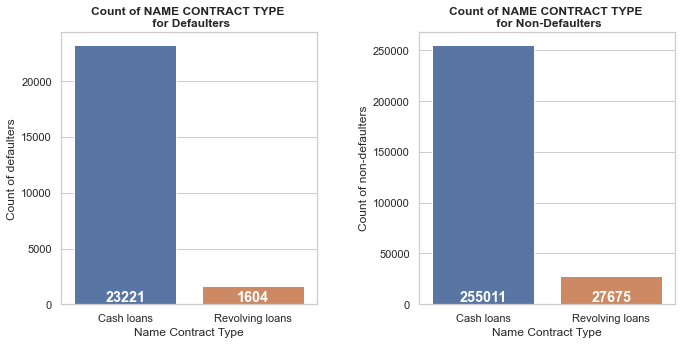

In [72]:
plot_categories('NAME_CONTRACT_TYPE')

In [73]:
# We have some (4) rows with CODE_GENDER values XNA in nondef_data. So, we're dropping the XNA values in CODE_GENDER column
app.loc[app.CODE_GENDER == 'XNA','CODE_GENDER'] = np.nan
nondef_data.loc[nondef_data.CODE_GENDER == 'XNA','CODE_GENDER'] = np.nan

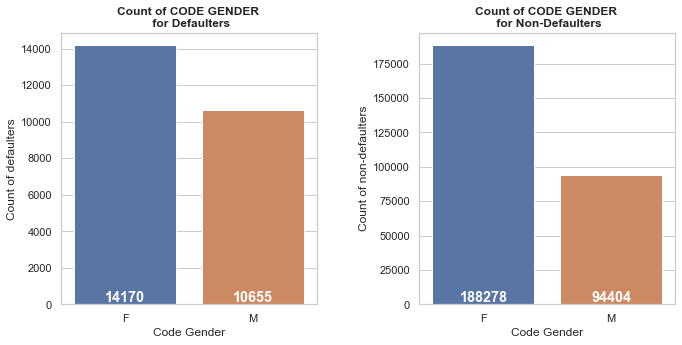

In [74]:
plot_categories('CODE_GENDER')

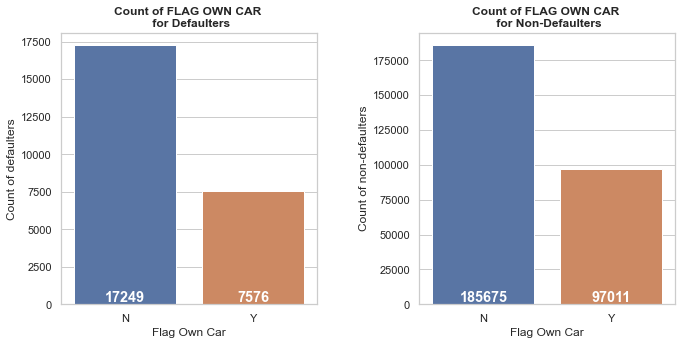

In [75]:
plot_categories('FLAG_OWN_CAR')

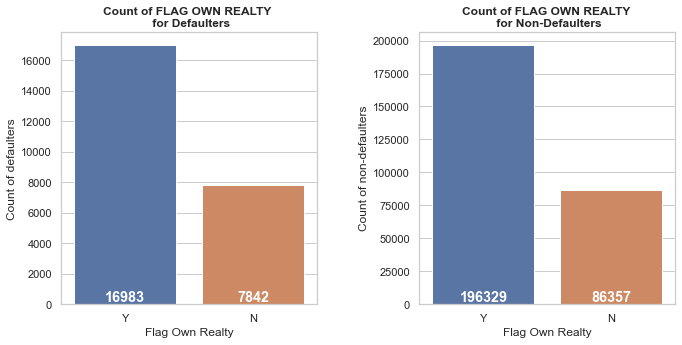

In [76]:
plot_categories('FLAG_OWN_REALTY')

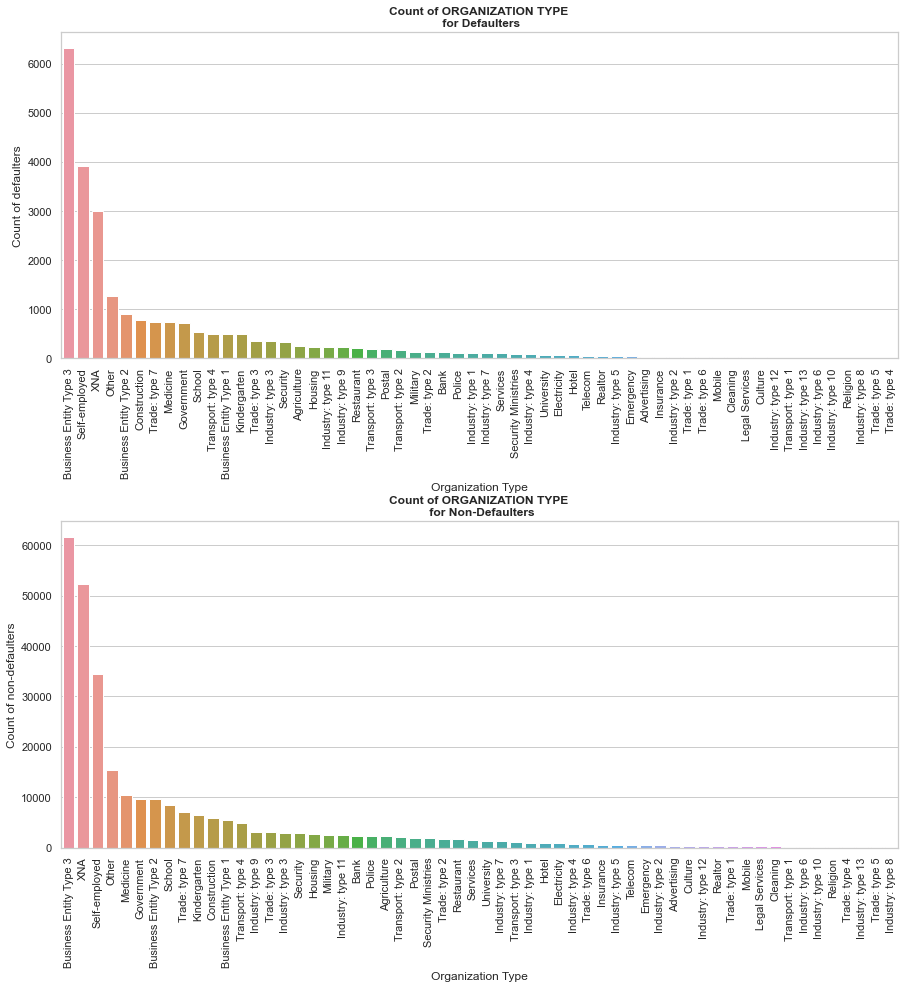

In [77]:
plot_categories('ORGANIZATION_TYPE', label_rotation=True, horizontal=False, values=False)

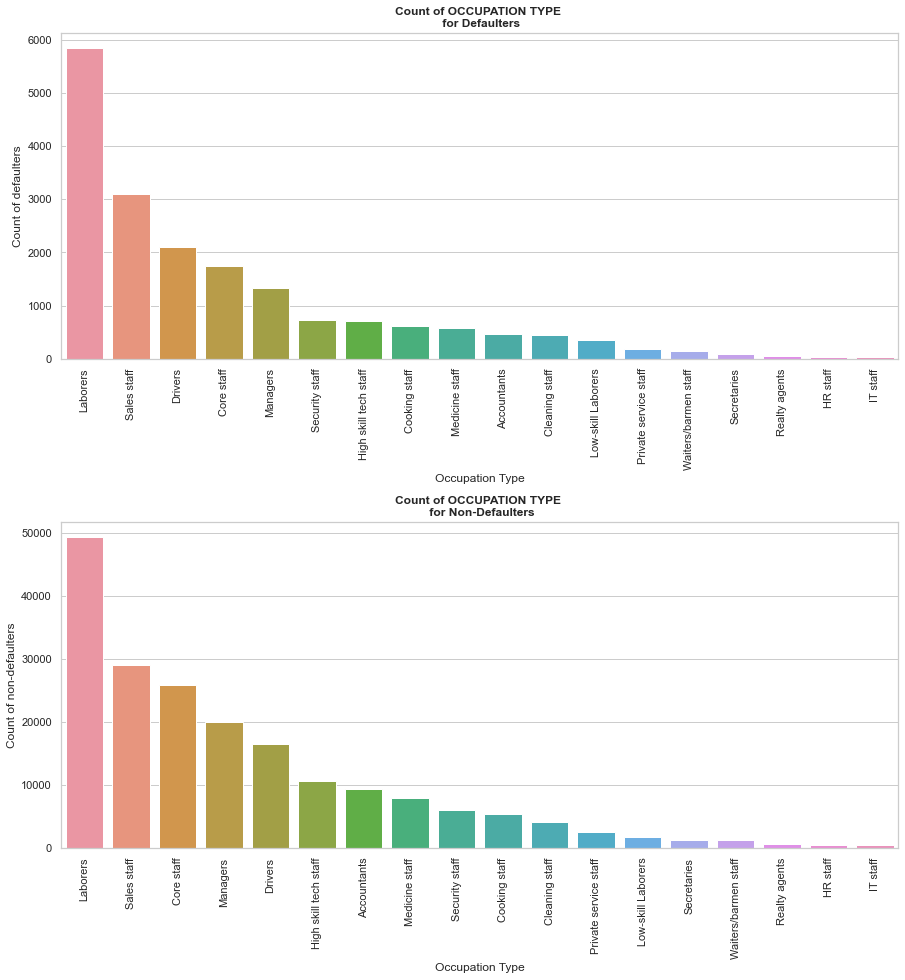

In [78]:
plot_categories('OCCUPATION_TYPE', label_rotation=True, horizontal=False, values=False)

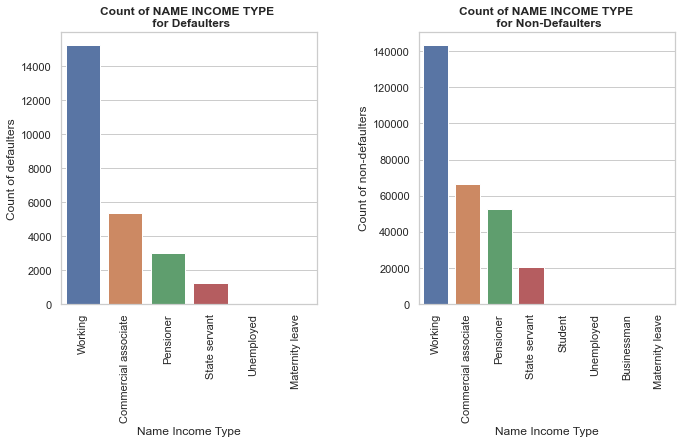

In [79]:
plot_categories('NAME_INCOME_TYPE', True, values=False)

**We can see that no student and businessmen are present in defaulter's data.**

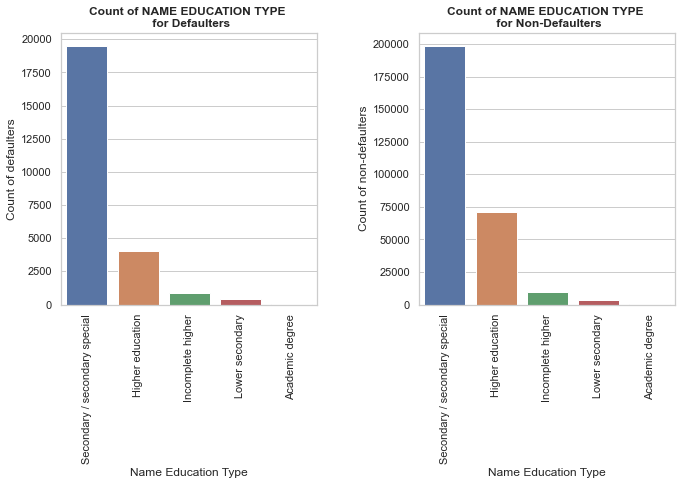

In [80]:
plot_categories('NAME_EDUCATION_TYPE', label_rotation=True, values=False)

We can clearly see that the Secondary educated persons are more likely to default compared to Higher education persons.

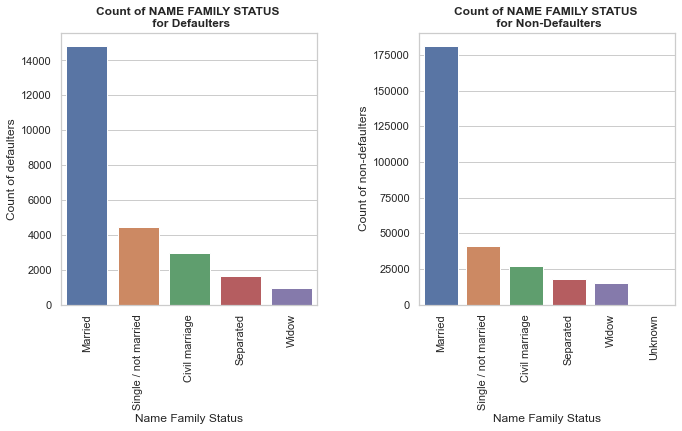

In [81]:
plot_categories('NAME_FAMILY_STATUS', label_rotation=True, values=False)

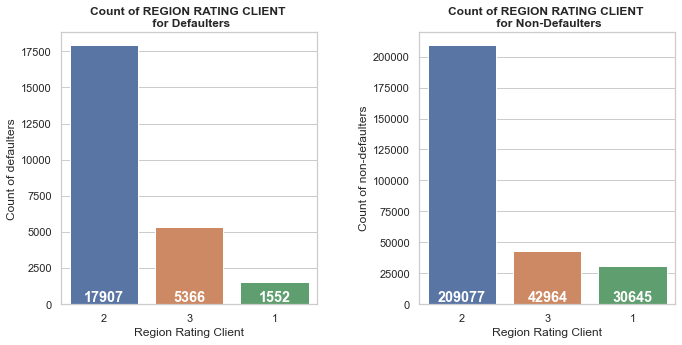

In [82]:
plot_categories('REGION_RATING_CLIENT')

### Numerical variables

In [83]:
def plot_num(a):
    
    f, (ax1,ax2) = plt.subplots(ncols=2, figsize=(11,5), sharey=True)
    plt.subplots_adjust(wspace=0.4)
    
    a1 = (a.replace('_',' ')).title()
    
    f1 = sns.boxplot(y=def_data[a], ax=ax1, color='coral', showmeans=True, meanline=True,  
                     meanprops=dict(linestyle='--', linewidth=1.5, color='w'))
    ax1.set_title('''Distribution of %s \n for Defaulters''' %(a1.upper()), fontsize=12, weight='bold')
    ax1.set_xlabel(a1)
    
    f2 = sns.boxplot(y=nondef_data[a], ax=ax2, color='mediumseagreen', showmeans=True, meanline=True,  
                     meanprops=dict(linestyle='--', linewidth=1.5, color='w'))
    ax2.set_title('''Distribution of %s \n for Non-Defaulters''' %(a1.upper()), fontsize=12, weight='bold')
    ax2.set_xlabel(a1)
    
    plt.show()

#### AMT_INCOME_TOTAL

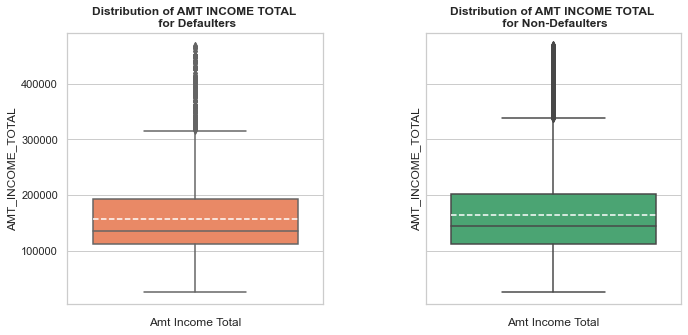

In [84]:
plot_num('AMT_INCOME_TOTAL')

#### AMT_CREDIT

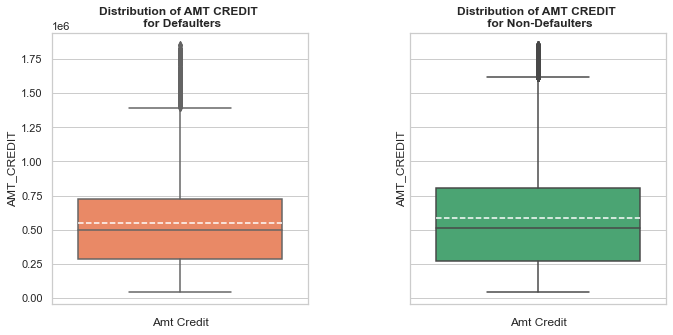

In [85]:
plot_num('AMT_CREDIT')

#### AMT_ANNUITY

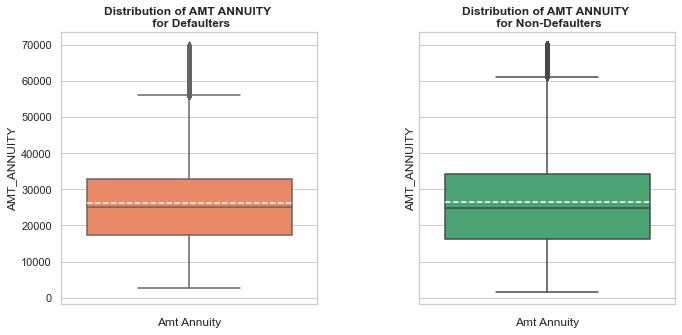

In [86]:
plot_num('AMT_ANNUITY')

#### AMT_GOODS_PRICE

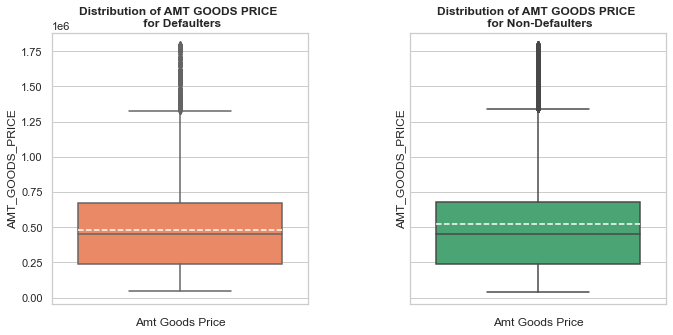

In [87]:
plot_num('AMT_GOODS_PRICE')

#### YEARS_BIRTH

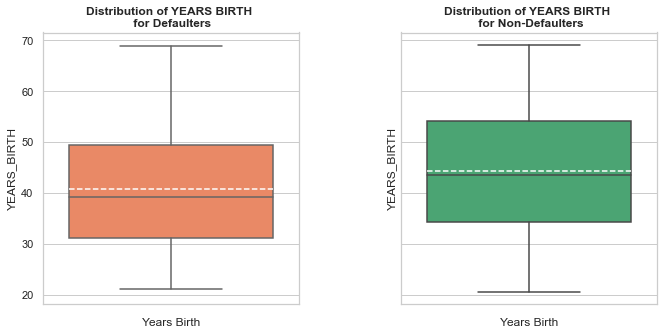

In [88]:
plot_num('YEARS_BIRTH')

The average age of defaulters is slightly lesser than that of the non-defaulters.

#### EXT_SOURCE_2

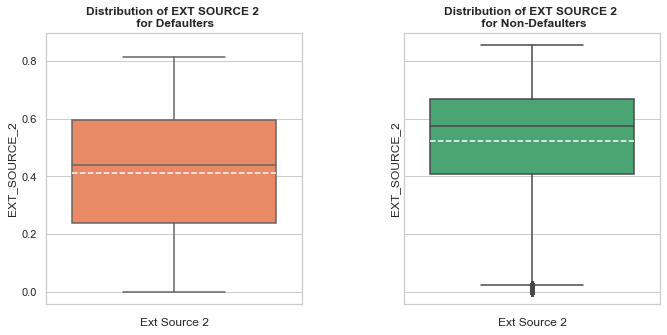

In [89]:
plot_num('EXT_SOURCE_2')

The average value from External Source 2 is higher for Non-Defaulters.

#### EXT_SOURCE_3

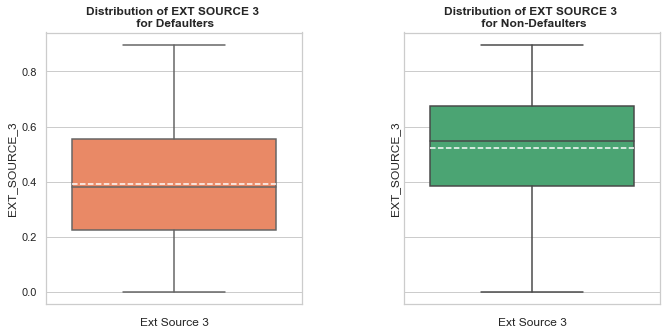

In [90]:
plot_num('EXT_SOURCE_3')

The average value from External Source 3 is higher for Non-Defaulters.

#### REGION_POPULATION_RELATIVE

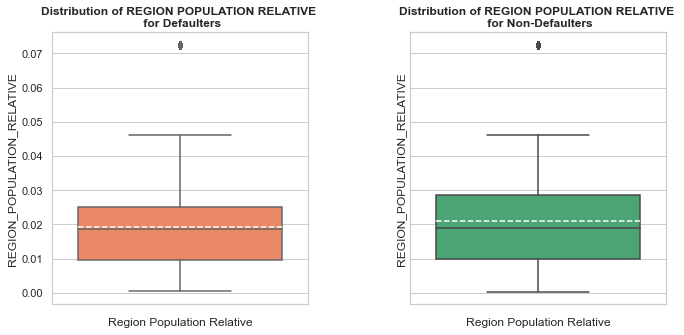

In [91]:
plot_num('REGION_POPULATION_RELATIVE')

### Bivariate analysis of numerical variables

#### Numerical - Numerical

In [92]:
# Defining function to get top n correlated variables from the dataset
def correlation2(df1, df2, n = 0):
    df1_corr = df1.corr()
    df1_corr = df1_corr.where(np.triu(np.ones(df1_corr.shape), k=1).astype(np.bool))
    corr_1 = df1_corr.unstack().reset_index()
    corr_1.columns  = ['VAR1_1', 'VAR2_1', 'Correlation_1']
    corr_1 = corr_1.dropna(subset = ['Correlation_1'])
    corr_1.Correlation_1 = abs(corr_1.Correlation_1)
    corr_1 = corr_1.sort_values(by='Correlation_1', ascending=False)
    
    df2_corr = df2.corr()
    df2_corr = df2_corr.where(np.triu(np.ones(df2_corr.shape), k=1).astype(np.bool))
    corr_2 = df2_corr.unstack().reset_index()
    corr_2.columns  = ['VAR1_2', 'VAR2_2', 'Correlation_2']
    corr_2 = corr_2.dropna(subset = ['Correlation_2'])
    corr_2.Correlation_2 = abs(corr_2.Correlation_2)
    corr_2 = corr_2.sort_values(by='Correlation_2', ascending=False)
    
    corr = pd.concat([corr_1,corr_2],axis=1).sort_values(by='Correlation_1', ascending=False)
    
    if n == 0:
        return corr.style.set_caption('Correlation between variables of df1 and df2')\
    .background_gradient(cmap='Greens',subset=['Correlation_1','Correlation_2'])\
    .format('{:.3f}',subset=['Correlation_1','Correlation_2'])
    elif n > 0:
        return corr[:n].style.set_caption('Correlation between variables of df1 and df2')\
    .background_gradient(cmap='Greens',subset=['Correlation_1','Correlation_2'])\
    .format('{:.3f}',subset=['Correlation_1','Correlation_2'])

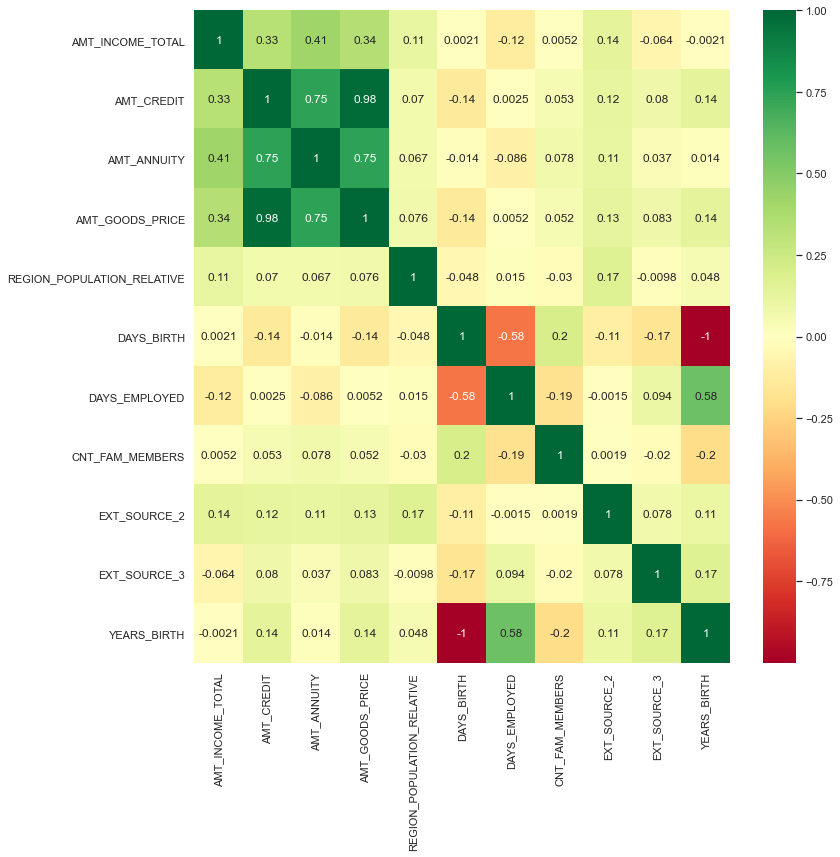

In [93]:
# Plotting the correlation heatmap for defaulters data
plt.figure(figsize=(12,12))
def_corr = def_data.iloc[:,1:].corr()
sns.heatmap(def_corr, annot=True, cmap='RdYlGn')
plt.show()

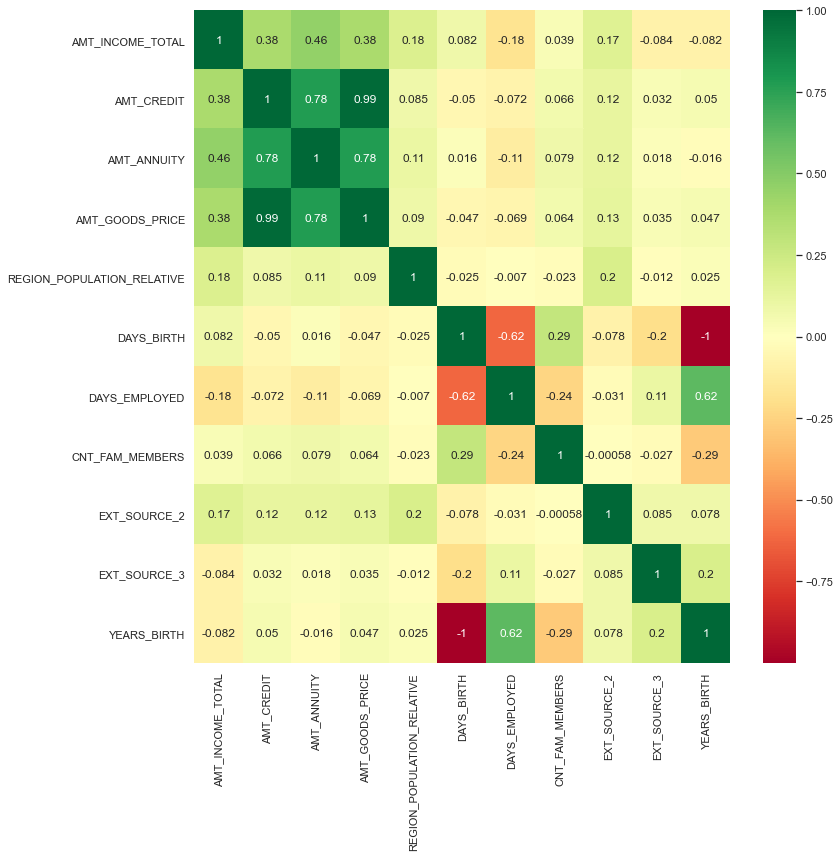

In [94]:
# Plotting the correlation heatmap for non-defaulters data
plt.figure(figsize=(12,12))
nondef_corr = nondef_data.iloc[:,1:].corr()
sns.heatmap(nondef_corr, annot=True, cmap='RdYlGn')
plt.show()

#### Top 10 correlation of def_data and nondef_data

In [95]:
correlation2(def_data, nondef_data, 10)

,VAR1_1,VAR2_1,Correlation_1,VAR1_2,VAR2_2,Correlation_2
138,YEARS_BIRTH,DAYS_BIRTH,1.000,YEARS_BIRTH,DAYS_BIRTH,1.000
50,AMT_GOODS_PRICE,AMT_CREDIT,0.981,AMT_GOODS_PRICE,AMT_CREDIT,0.985
38,AMT_ANNUITY,AMT_CREDIT,0.750,AMT_ANNUITY,AMT_CREDIT,0.778
51,AMT_GOODS_PRICE,AMT_ANNUITY,0.747,AMT_GOODS_PRICE,AMT_ANNUITY,0.777
139,YEARS_BIRTH,DAYS_EMPLOYED,0.575,YEARS_BIRTH,DAYS_EMPLOYED,0.618
90,DAYS_EMPLOYED,DAYS_BIRTH,0.575,DAYS_EMPLOYED,DAYS_BIRTH,0.618
37,AMT_ANNUITY,AMT_INCOME_TOTAL,0.414,AMT_ANNUITY,AMT_INCOME_TOTAL,0.457
49,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.336,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.381
25,AMT_CREDIT,AMT_INCOME_TOTAL,0.334,AMT_CREDIT,AMT_INCOME_TOTAL,0.379
102,CNT_FAM_MEMBERS,DAYS_BIRTH,0.203,CNT_FAM_MEMBERS,DAYS_BIRTH,0.286


**From the Correlation matrix, we can infer that the variables AMT_GOODS_PROCE and AMT_CREDIT have highest correlation between them for both defaulters and Non-defaulters case.** Though, the YEARS_BIRTH and DAYS_BIRTH have highest correlation we are not considering them as they are mutually dependent variables.


#### Categorical - Numerical

In [96]:
def plot_catnum(a,b,label_rotation=False):
    
    f, (ax1,ax2) = plt.subplots(ncols=2, figsize=(11,5), sharey=True)
    plt.subplots_adjust(wspace=0.4)
    
    a1 = (a.replace('_',' ')).title()
    b1 = (b.replace('_',' ')).title()
    
    f1 = sns.boxplot(x=def_data[a], y=def_data[b], ax=ax1,
                     color='coral', showmeans=True, meanline=True,  
                     meanprops=dict(linestyle='--', linewidth=1.5, color='w'))
    ax1.set_title('''Distribution of %s and \n %s for Defaulters''' %(a1.upper(),b1.upper()), fontsize=12, weight='bold')
    ax1.set_xlabel(a1)
    
    f2 = sns.boxplot(x=nondef_data[a], y=nondef_data[b], ax=ax2,
                     color='mediumseagreen', showmeans=True, meanline=True,  
                     meanprops=dict(linestyle='--', linewidth=1.5, color='w'))
    ax2.set_title('''Distribution of %s and \n %s for Non-Defaulters''' %(a1.upper(),b1.upper()), fontsize=12, weight='bold')
    ax2.set_xlabel(a1)
    
    if label_rotation:
        f1.set_xticklabels(f1.get_xticklabels(), rotation=90)
        f2.set_xticklabels(f2.get_xticklabels(), rotation=90)
    
    plt.show()

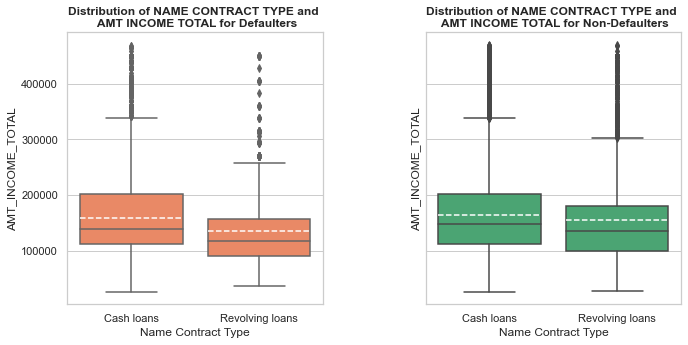

In [97]:
plot_catnum('NAME_CONTRACT_TYPE','AMT_INCOME_TOTAL')

From the above plot, we can see the distribution of type of loan and their income distribution is more or less same for both the cases (defaulters and non-defaulters).

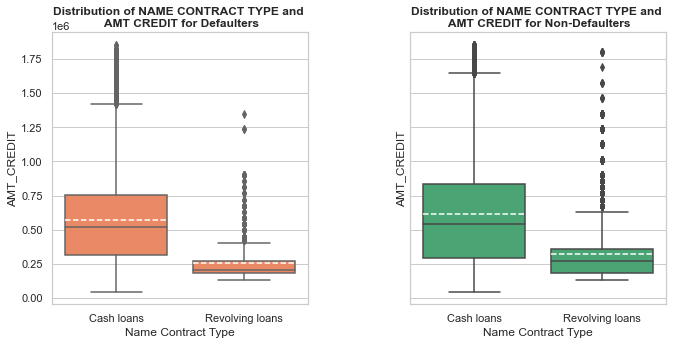

In [98]:
plot_catnum('NAME_CONTRACT_TYPE','AMT_CREDIT')

From the above plot, we can see that the average AMT_CREDIT wrt the type of the loan is slightly lesser for the defaulters than the non-defaulters.

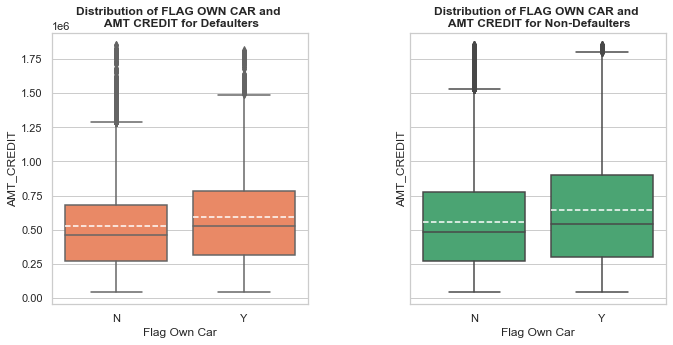

In [99]:
plot_catnum('FLAG_OWN_CAR','AMT_CREDIT')

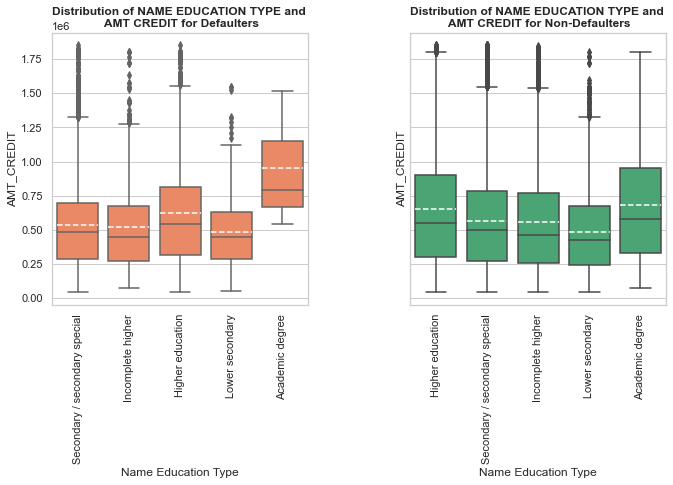

In [100]:
plot_catnum('NAME_EDUCATION_TYPE','AMT_CREDIT',True)

On an average, we can see that Academic degree holders are more likely to take higher value of credit.

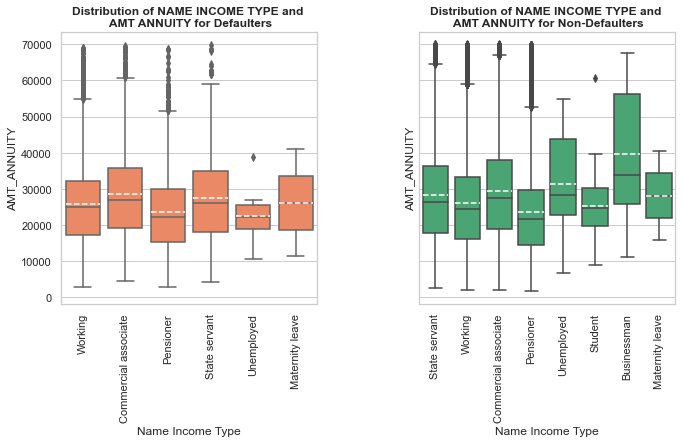

In [101]:
plot_catnum('NAME_INCOME_TYPE','AMT_ANNUITY',True)

- The annuity amount for the unemployed is higher in non-defaulters than in defaulters.
- The average annuity amount is lowest for the pensioners in both the cases.

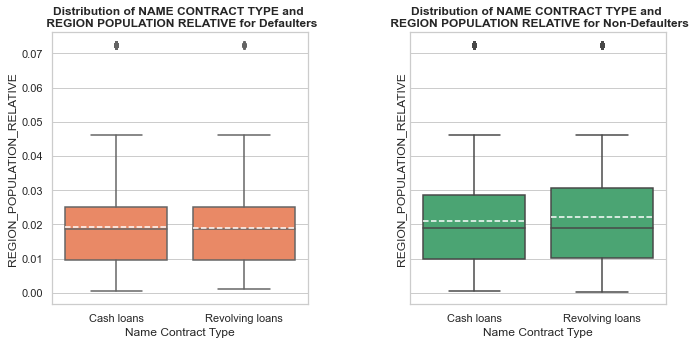

In [102]:
plot_catnum('NAME_CONTRACT_TYPE','REGION_POPULATION_RELATIVE')

## Multivariate Analysis

In [103]:
# Adding TARGET_NUM column derived from TARGET to app dataframe to plot heatmaps
def target(x):
    if x=='N':
        return 0
    elif x=='Y':
        return 1

app['TARGET_NUM'] = app.TARGET.apply(target)

In [104]:
app.TARGET_NUM.value_counts()

0    282686
1    24825 
Name: TARGET_NUM, dtype: int64

In [105]:
# Defining function for plotting heatmap for multivariate analysis of 2 categorical variables and TARGET
def multi_heatmap(df, a, b, large=False):
    if large:
        plt.figure(figsize=(15,15))
    res = pd.pivot_table(data=df,index=a,columns=b,values='TARGET_NUM')
    sns.heatmap(res,annot=True,cmap='RdYlGn')
    plt.show()

#### Education Type vs. Contract Type

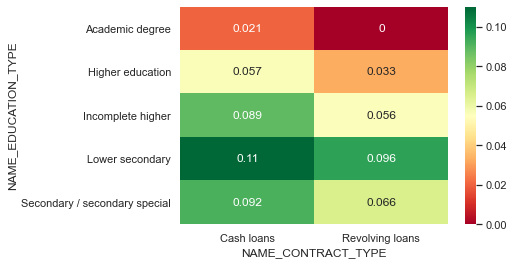

In [106]:
multi_heatmap(app,'NAME_EDUCATION_TYPE','NAME_CONTRACT_TYPE')

Lower secondary people who take cash loans are more likely to default.

#### Occupation Type vs. Contract Type

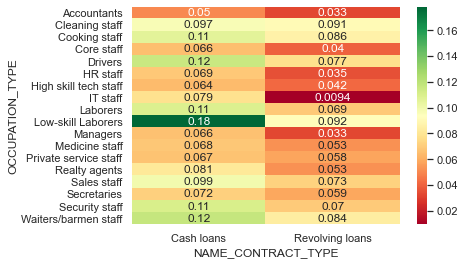

In [107]:
multi_heatmap(app,'OCCUPATION_TYPE','NAME_CONTRACT_TYPE')

Low skilled labourers taking cash loans are more likely to default.

#### Age Group vs. Contract Type

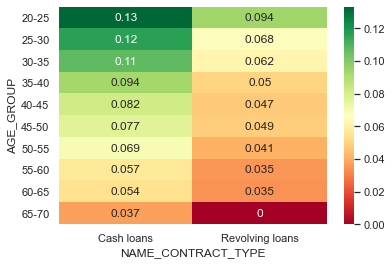

In [108]:
multi_heatmap(app,'AGE_GROUP','NAME_CONTRACT_TYPE')

Youngsters (20-30) taking cash loans are more likely to default.

#### Occupation Type vs. Age Group

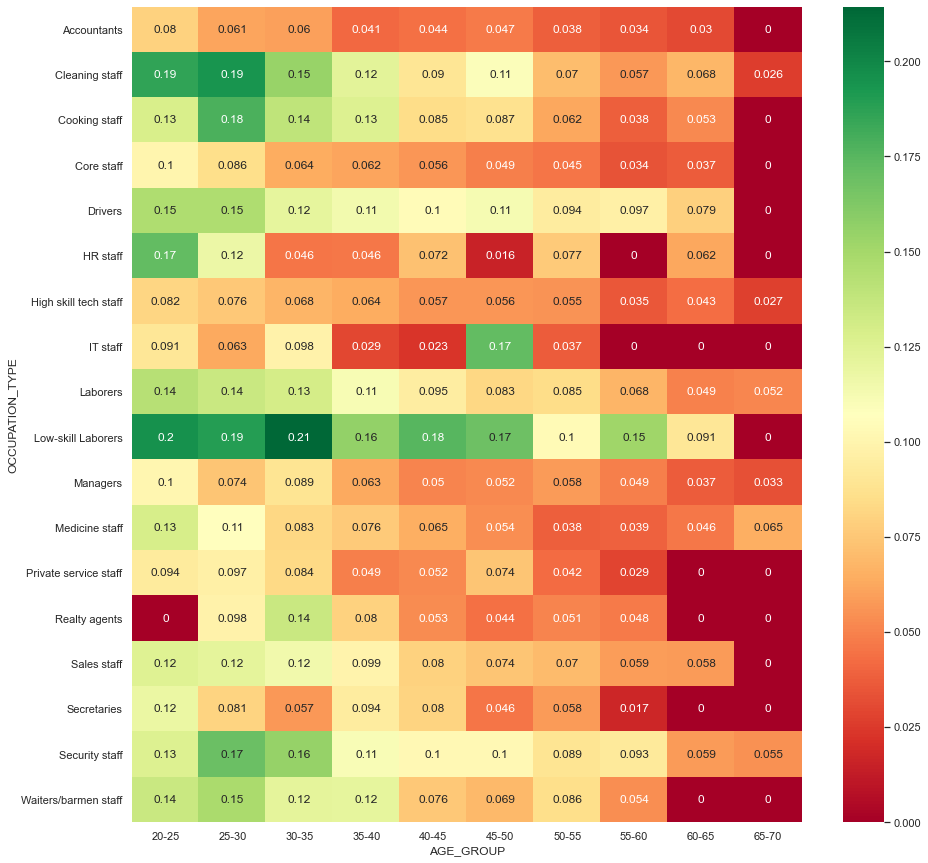

In [109]:
multi_heatmap(app,'OCCUPATION_TYPE','AGE_GROUP',True)

- Low skilled labourers who are in the age group 25-50 are likely default more than other occupation people of same age group.
- Cleaning staff of age group 20-30 are more likely to default.

#### Income Range vs. Contract Type

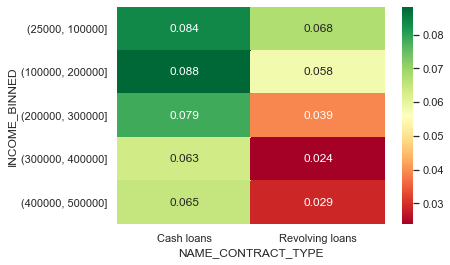

In [110]:
multi_heatmap(app,'INCOME_BINNED', 'NAME_CONTRACT_TYPE')

Clients with below average salary (<300000) taking cash loans are more likely to default.

#### Occupation Type vs. Gender

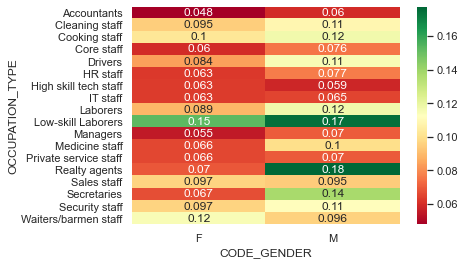

In [111]:
multi_heatmap(app,'OCCUPATION_TYPE','CODE_GENDER')

Low-skilled labourers and Realty agents are more likely to default than other people.

#### Income Range vs. Gender

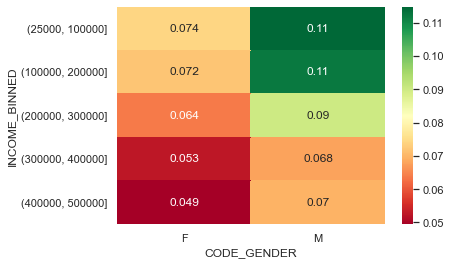

In [112]:
multi_heatmap(app,'INCOME_BINNED','CODE_GENDER')

Males earning below average salary are more likely to default.

#### Age Group vs. Region Rating

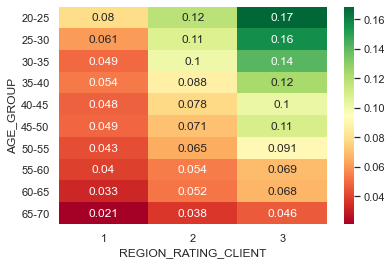

In [113]:
multi_heatmap(app,'AGE_GROUP','REGION_RATING_CLIENT')

We can infer from the heatmap that, young and middle-aged(35-50) people from region with rating 3 are more likely to default.

## Analysis of previous_application.csv

In [114]:
pre = pd.read_csv('previous_application.csv', na_values=['XNA','XAP'], keep_default_na=True)

In [115]:
pre.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430000,17145.000000,17145.000000,0.000000,17145.000000,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,NaN,Approved,-73,Cash through the bank,NaN,NaN,Repeater,Mobile,POS,NaN,Country-wide,35,Connectivity,12.000000,middle,POS mobile with interest,365243.000000,-42.000000,300.000000,-42.000000,-37.000000,0.000000
1,2802425,108129,Cash loans,25188.615000,607500.000000,679671.000000,nan,607500.000000,THURSDAY,11,Y,1,nan,nan,nan,NaN,Approved,-164,NaN,NaN,Unaccompanied,Repeater,NaN,Cash,x-sell,Contact center,-1,NaN,36.000000,low_action,Cash X-Sell: low,365243.000000,-134.000000,916.000000,365243.000000,365243.000000,1.000000
2,2523466,122040,Cash loans,15060.735000,112500.000000,136444.500000,nan,112500.000000,TUESDAY,11,Y,1,nan,nan,nan,NaN,Approved,-301,Cash through the bank,NaN,"Spouse, partner",Repeater,NaN,Cash,x-sell,Credit and cash offices,-1,NaN,12.000000,high,Cash X-Sell: high,365243.000000,-271.000000,59.000000,365243.000000,365243.000000,1.000000
3,2819243,176158,Cash loans,47041.335000,450000.000000,470790.000000,nan,450000.000000,MONDAY,7,Y,1,nan,nan,nan,NaN,Approved,-512,Cash through the bank,NaN,NaN,Repeater,NaN,Cash,x-sell,Credit and cash offices,-1,NaN,12.000000,middle,Cash X-Sell: middle,365243.000000,-482.000000,-152.000000,-182.000000,-177.000000,1.000000
4,1784265,202054,Cash loans,31924.395000,337500.000000,404055.000000,nan,337500.000000,THURSDAY,9,Y,1,nan,nan,nan,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,NaN,Cash,walk-in,Credit and cash offices,-1,NaN,24.000000,high,Cash Street: high,nan,nan,nan,nan,nan,nan


In [116]:
pre.shape

(1670214, 37)

The previous application dataset has 1670214 rows and 37 columns.

In [117]:
pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1669868 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [118]:
pre.dtypes.value_counts()

object     16
float64    15
int64      6 
dtype: int64

In [119]:
pre.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1670214.000000,1670214.000000,1297979.000000,1670214.000000,1670213.000000,774370.000000,1284699.000000,1670214.000000,1670214.000000,774370.000000,5951.000000,5951.000000,1670214.000000,1670214.000000,1297984.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1923089.135331,278357.174099,15955.120659,175233.860360,196114.021218,6697.402139,227847.279283,12.484182,0.996468,0.079637,0.188357,0.773503,-880.679668,313.951115,16.054082,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,532597.958696,102814.823849,14782.137335,292779.762387,318574.616546,20921.495410,315396.557937,3.334028,0.059330,0.107823,0.087671,0.100879,779.099667,7127.443459,14.567288,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1000001.000000,100001.000000,0.000000,0.000000,0.000000,-0.900000,0.000000,0.000000,0.000000,-0.000015,0.034781,0.373150,-2922.000000,-1.000000,0.000000,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1461857.250000,189329.000000,6321.780000,18720.000000,24160.500000,0.000000,50841.000000,10.000000,1.000000,0.000000,0.160716,0.715645,-1300.000000,-1.000000,6.000000,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1923110.500000,278714.500000,11250.000000,71046.000000,80541.000000,1638.000000,112320.000000,12.000000,1.000000,0.051605,0.189122,0.835095,-581.000000,3.000000,12.000000,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2384279.750000,367514.000000,20658.420000,180360.000000,216418.500000,7740.000000,234000.000000,15.000000,1.000000,0.108909,0.193330,0.852537,-280.000000,82.000000,24.000000,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2845382.000000,456255.000000,418058.145000,6905160.000000,6905160.000000,3060045.000000,6905160.000000,23.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,4000000.000000,84.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [120]:
pre_attr = df_attr(pre)
pre_attr

,COUNT,NULL,PERCENT,NUM_UNIQUE,DATATYPE
RATE_INTEREST_PRIMARY,5951,1664263,99.643700,148,float64
RATE_INTEREST_PRIVILEGED,5951,1664263,99.643700,25,float64
NAME_CASH_LOAN_PURPOSE,69635,1600579,95.830800,23,object
CODE_REJECT_REASON,311877,1358337,81.327100,7,object
NAME_PRODUCT_TYPE,606548,1063666,63.684400,2,object
NAME_GOODS_CATEGORY,719405,950809,56.927400,27,object
AMT_DOWN_PAYMENT,774370,895844,53.636500,29278,float64
RATE_DOWN_PAYMENT,774370,895844,53.636500,207033,float64
NAME_SELLER_INDUSTRY,814494,855720,51.234200,10,object
NAME_TYPE_SUITE,849809,820405,49.119800,7,object


### Univariate Analysis

In [121]:
# Percentage of applications based on their contract status
pre.NAME_CONTRACT_STATUS.value_counts(normalize=True)*100

Approved       62.074740
Canceled       18.938831
Refused        17.403638
Unused offer   1.582791 
Name: NAME_CONTRACT_STATUS, dtype: float64

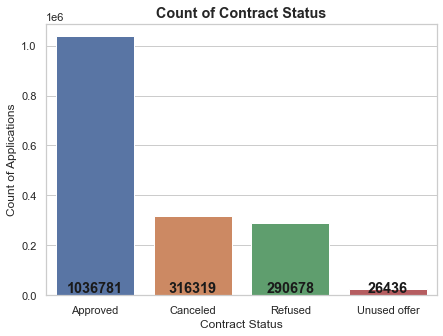

In [122]:
plt.figure(figsize=(7,5))
sns.countplot(pre['NAME_CONTRACT_STATUS'], order=pre.NAME_CONTRACT_STATUS.value_counts().index)
plt.title('Count of Contract Status', fontsize='large', weight='bold')
plt.xlabel('Contract Status')
plt.ylabel('Count of Applications')
x = list(pre.NAME_CONTRACT_STATUS.value_counts())
for i, v in enumerate(x):
    plt.text(i, v/x[i], x[i], fontsize='large', ha='center', va='bottom', weight='bold', color='k')
plt.show()

In [123]:
# Dividing the dataframes based on their contract status
approved = pre.loc[pre.NAME_CONTRACT_STATUS == 'Approved',:]
canceled = pre.loc[pre.NAME_CONTRACT_STATUS == 'Canceled',:]
refused = pre.loc[pre.NAME_CONTRACT_STATUS == 'Refused',:]
unused = pre.loc[pre.NAME_CONTRACT_STATUS == 'Unused offer',:]

In [124]:
def plot_4cat(a, label_rotation=False):
    
    f, axs = plt.subplots(2,2, figsize=(15,15), sharex=label_rotation)
    plt.subplots_adjust(wspace=0.4)
    plt.subplots_adjust(hspace=0.2)
    
    a1 = (a.replace('_',' ')).title()
    
    f1 = sns.countplot(approved[a], ax=axs[0, 0], order = pre[a].value_counts().index)
    axs[0, 0].set_title('''Count of %s \n for Approved applications''' %(a1.upper()), fontsize=12, weight='bold')
    axs[0, 0].set_xlabel(a1)
    axs[0, 0].set_ylabel('Count of applications')
    
    f2 = sns.countplot(canceled[a], ax=axs[0, 1], order = pre[a].value_counts().index)
    axs[0, 1].set_title('''Count of %s \n for Canceled applications''' %(a1.upper()), fontsize=12, weight='bold')
    axs[0, 1].set_xlabel(a1)
    axs[0, 1].set_ylabel('Count of applications')
    
    f3 = sns.countplot(refused[a], ax=axs[1, 0], order = pre[a].value_counts().index)
    axs[1, 0].set_title('''Count of %s \n for Refused applications''' %(a1.upper()), fontsize=12, weight='bold')
    axs[1, 0].set_xlabel(a1)
    axs[1, 0].set_ylabel('Count of applications')
    
    f4 = sns.countplot(unused[a], ax=axs[1, 1], order = pre[a].value_counts().index)
    axs[1, 1].set_title('''Count of %s \n for Unused applications''' %(a1.upper()), fontsize=12, weight='bold')
    axs[1, 1].set_xlabel(a1)
    axs[1, 1].set_ylabel('Count of applications')
    
    if label_rotation:
        f1.set_xticklabels(f1.get_xticklabels(), rotation=90)
        f2.set_xticklabels(f2.get_xticklabels(), rotation=90)
        f3.set_xticklabels(f3.get_xticklabels(), rotation=90)
        f4.set_xticklabels(f4.get_xticklabels(), rotation=90)
    
    plt.show()

#### NAME_YIELD_GROUP

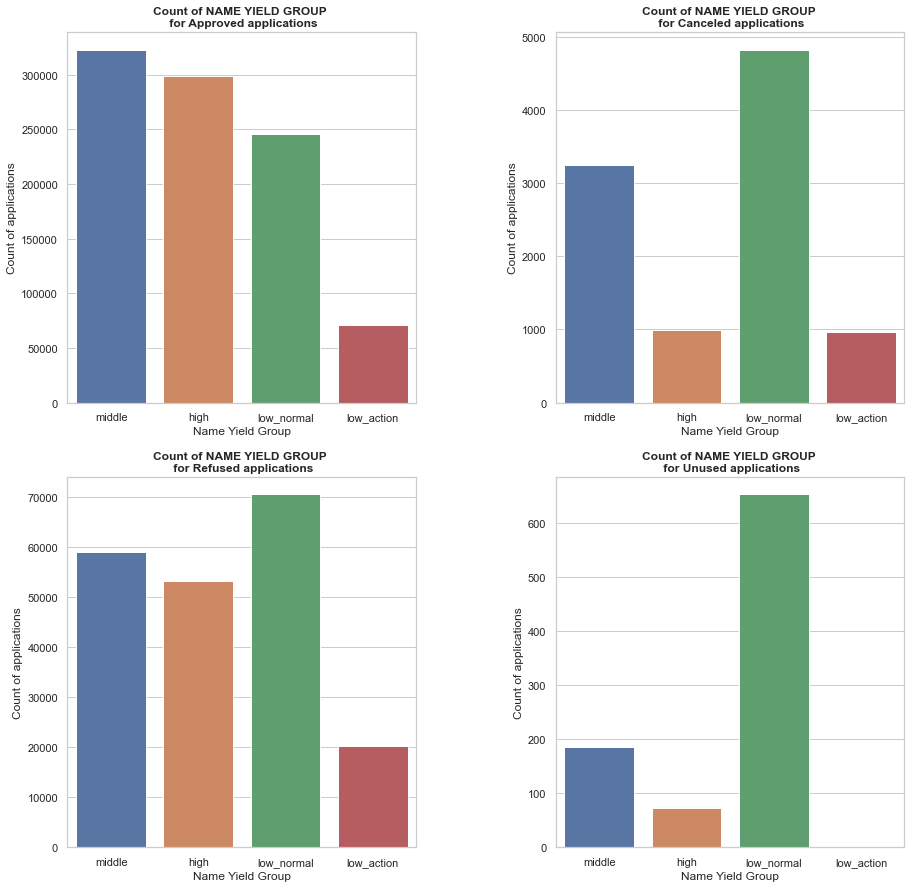

In [125]:
plot_4cat('NAME_YIELD_GROUP')

- Majority of the approved loans are from Middle Yield Group.
- Majority of the refused, canceled and unused loans are from Low Normal Yield Group.

**Chances of getting loans approved is higher middle and high income yield groups.**

#### PRODUCT_COMBINATION

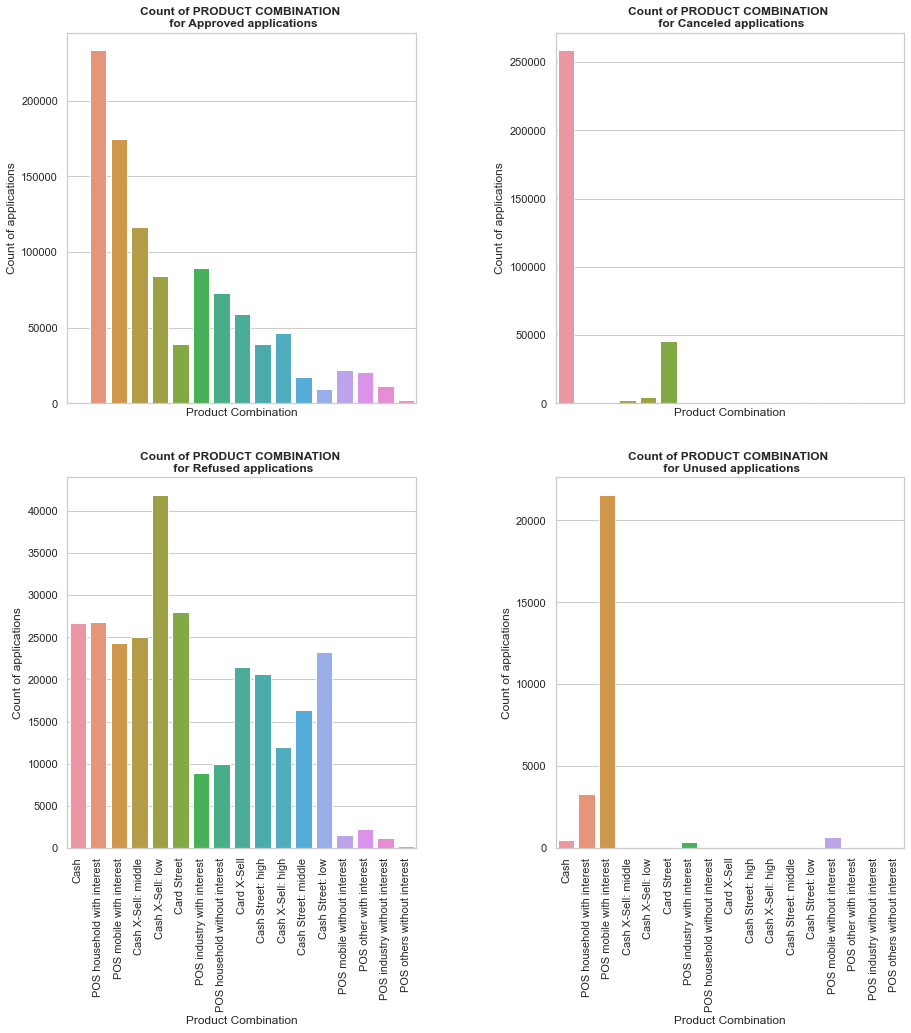

In [126]:
plot_4cat('PRODUCT_COMBINATION', True)

- Nearly all the cash type applications doesn't get approved.
- POS househould with interest constitutes the highest approval.

#### NAME_PORTFOLIO

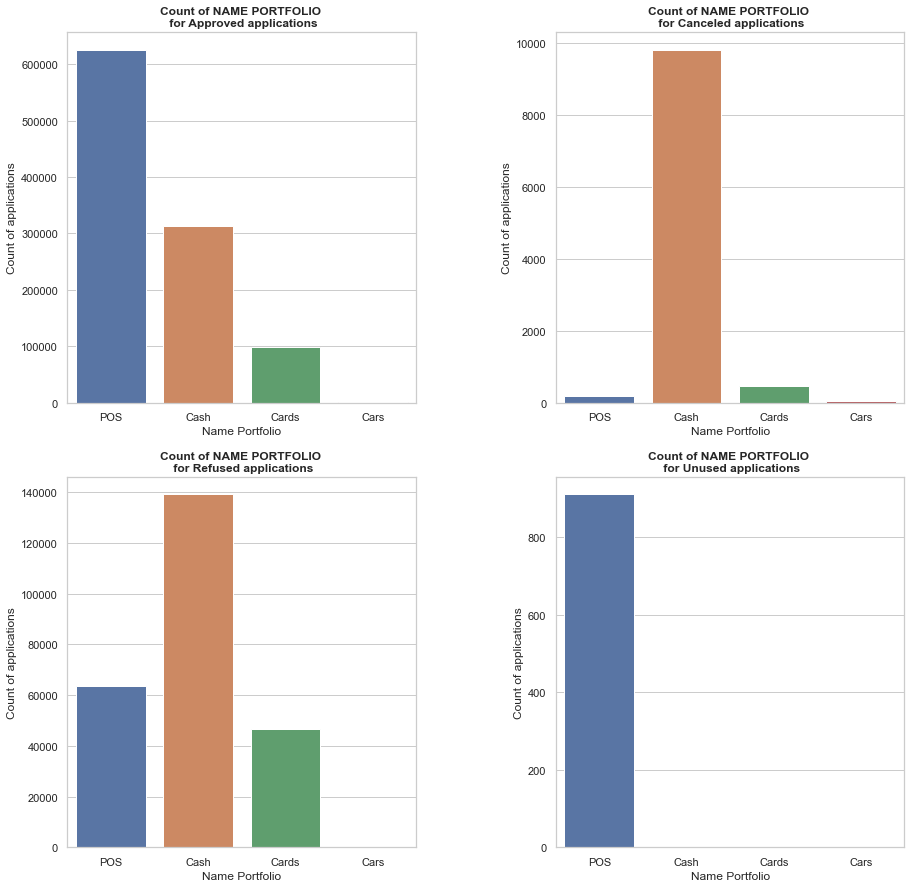

In [127]:
plot_4cat('NAME_PORTFOLIO')

- Cash constitutes majority of the cancelled and refused applications.
- POS loans has the highest rate of approval.

#### NAME_CLIENT_TYPE

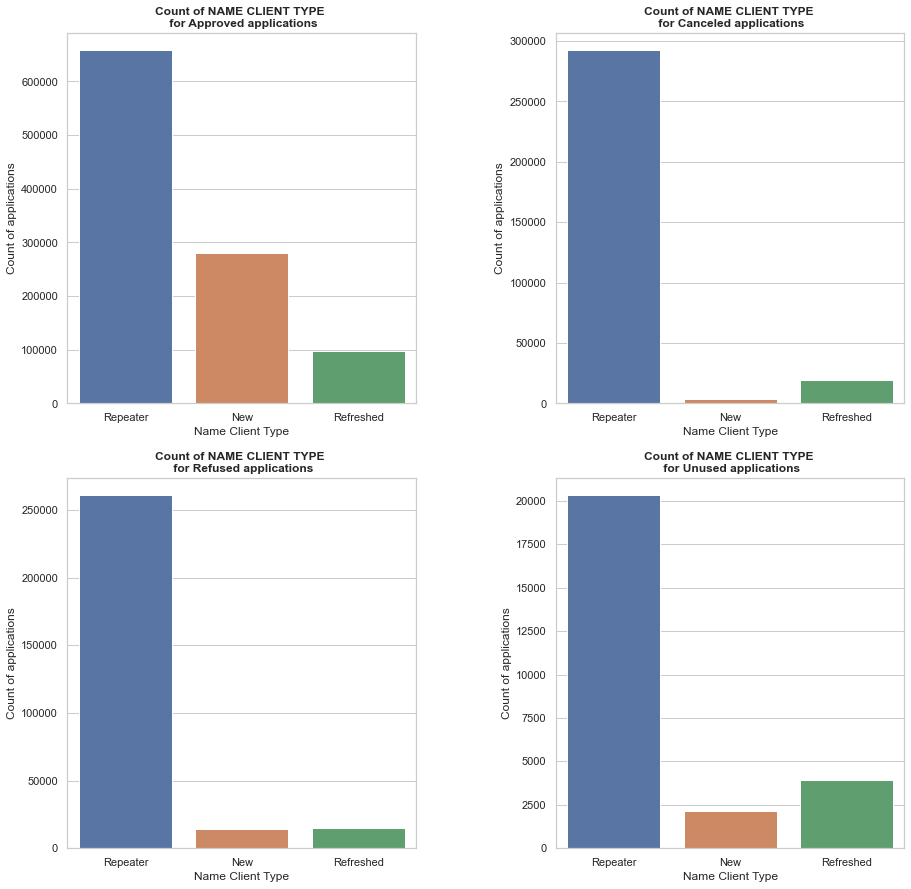

In [128]:
plot_4cat('NAME_CLIENT_TYPE')

From the above plot, we can see that the chances of new application getting approved is higher than that of the other types.

#### NAME_CONTRACT_TYPE

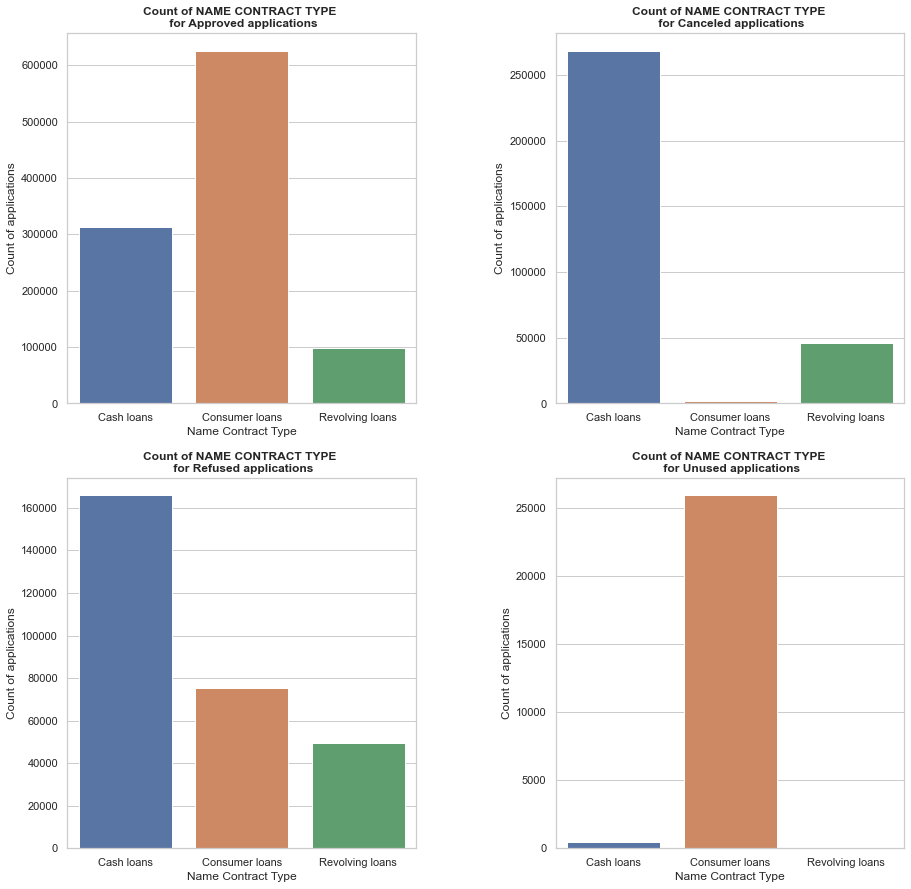

In [129]:
plot_4cat('NAME_CONTRACT_TYPE')

- Consumer loans constitutes the majority of approved loan applications.
- Cash loans constitutes the majority of refused and cancelled loan applicatons.

### Analysing the status of previous application(s) and the current application

In [130]:
# Generating a pivot table from pre dataframe based on the count of contract status
appl_status = pre.pivot_table(values='SK_ID_PREV', columns='NAME_CONTRACT_STATUS', index='SK_ID_CURR', aggfunc='count')
appl_status.fillna(0, inplace=True)
appl_status.head()

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
SK_ID_CURR,,,,
100001,1.000000,0.000000,0.000000,0.000000
100002,1.000000,0.000000,0.000000,0.000000
100003,3.000000,0.000000,0.000000,0.000000
100004,1.000000,0.000000,0.000000,0.000000
100005,1.000000,1.000000,0.000000,0.000000


_We are using left join to retain all the unique values of SK_ID_CURR from our application data._

In [131]:
# Merging the pivot table with the app data
status_df = pd.merge(app, appl_status, how='left', on='SK_ID_CURR')
status_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BIRTH,YEARS_BINNED,AGE_GROUP,INCOME_BINNED,TARGET_NUM,Approved,Canceled,Refused,Unused offer
0,100002,Y,Cash loans,M,N,Y,202500.000000,406597.500000,24700.500000,351000.000000,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,Laborers,1.000000,2,2,N,N,N,Business Entity Type 3,0.262949,0.139376,25.920000,"(25.0, 30.0]",25-30,"(200000, 300000]",1,1.000000,0.000000,0.000000,0.000000
1,100003,N,Cash loans,F,N,N,270000.000000,1293502.500000,35698.500000,1129500.000000,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,Core staff,2.000000,1,1,N,N,N,School,0.622246,nan,45.930000,"(45.0, 50.0]",45-50,"(200000, 300000]",0,3.000000,0.000000,0.000000,0.000000
2,100004,N,Revolving loans,M,Y,Y,67500.000000,135000.000000,6750.000000,135000.000000,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,Laborers,1.000000,2,2,N,N,N,Government,0.555912,0.729567,52.180000,"(50.0, 55.0]",50-55,"(25000, 100000]",0,1.000000,0.000000,0.000000,0.000000
3,100006,N,Cash loans,F,N,Y,135000.000000,312682.500000,29686.500000,297000.000000,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,Laborers,2.000000,2,2,N,N,N,Business Entity Type 3,0.650442,nan,52.070000,"(50.0, 55.0]",50-55,"(100000, 200000]",0,5.000000,3.000000,1.000000,0.000000
4,100007,N,Cash loans,M,N,Y,121500.000000,513000.000000,21865.500000,513000.000000,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,Core staff,1.000000,2,2,N,Y,Y,Religion,0.322738,nan,54.610000,"(50.0, 55.0]",50-55,"(100000, 200000]",0,6.000000,0.000000,0.000000,0.000000


In [132]:
status_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 36 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  object  
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307507 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   AMT_INCOME_TOTAL             304417 non-null  float64 
 7   AMT_CREDIT                   304434 non-null  float64 
 8   AMT_ANNUITY                  304418 non-null  float64 
 9   AMT_GOODS_PRICE              303656 non-null  float64 
 10  NAME_INCOME_TYPE             307511 non-null  object  
 11  NAME_EDUCATION_TYPE          307511 non-null  object  
 12  NAME_FAMILY_STATUS           307511 non-null

In [133]:
status_df.isnull().sum()

SK_ID_CURR                     0    
TARGET                         0    
NAME_CONTRACT_TYPE             0    
CODE_GENDER                    4    
FLAG_OWN_CAR                   0    
FLAG_OWN_REALTY                0    
AMT_INCOME_TOTAL               3094 
AMT_CREDIT                     3077 
AMT_ANNUITY                    3093 
AMT_GOODS_PRICE                3855 
NAME_INCOME_TYPE               0    
NAME_EDUCATION_TYPE            0    
NAME_FAMILY_STATUS             0    
NAME_HOUSING_TYPE              0    
REGION_POPULATION_RELATIVE     0    
DAYS_BIRTH                     0    
DAYS_EMPLOYED                  0    
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                2    
REGION_RATING_CLIENT           0    
REGION_RATING_CLIENT_W_CITY    0    
REG_CITY_NOT_LIVE_CITY         0    
REG_CITY_NOT_WORK_CITY         0    
LIVE_CITY_NOT_WORK_CITY        0    
ORGANIZATION_TYPE              0    
EXT_SOURCE_2                   660  
EXT_SOURCE_3                   60965
Y

_Here, we can see that the previous application counts are missing for 16454 current applicants. Probably, they are are new applicants who hasn't applied for any loan from the particular bank._

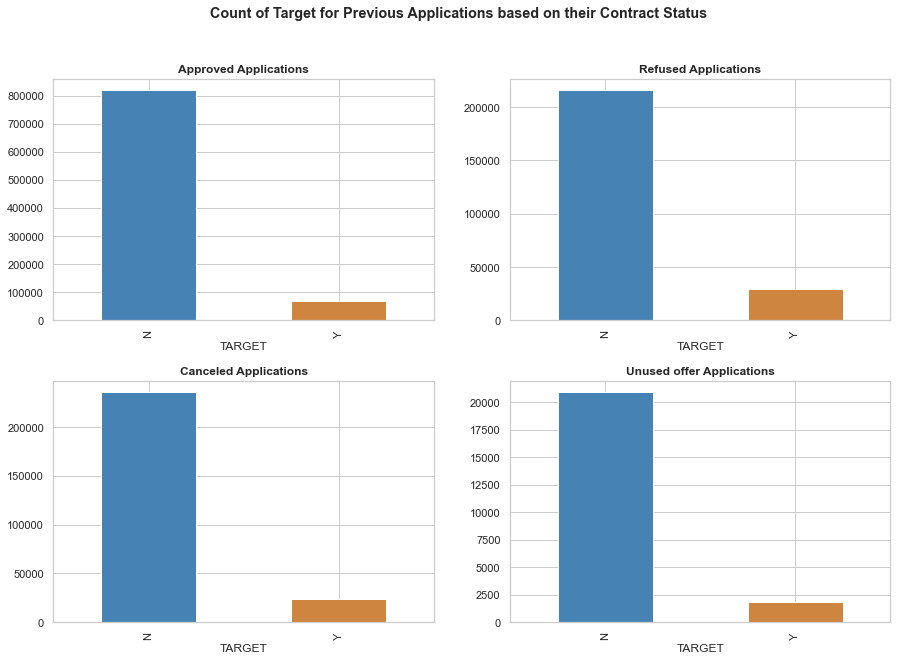

In [134]:
f = plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=0.25)
plt.suptitle('Count of Target for Previous Applications based on their Contract Status',weight='bold')
c = ['steelblue','peru']

ax1 = f.add_subplot(221)
status_df.groupby('TARGET')['Approved'].sum().plot.bar(color = c)
ax1.set_title('''Approved Applications''', weight='bold')
ax2 = f.add_subplot(222)
status_df.groupby('TARGET')['Refused'].sum().plot.bar(color = c)
ax2.set_title('''Refused Applications''', weight='bold')
ax3 = f.add_subplot(223)
status_df.groupby('TARGET')['Canceled'].sum().plot.bar(color = c)
ax3.set_title('''Canceled Applications''', weight='bold')
ax4 = f.add_subplot(224)
status_df.groupby('TARGET')['Unused offer'].sum().plot.bar(color = c)
ax4.set_title('''Unused offer Applications''', weight='bold')
plt.show()

**The ratio of TARGET variable is almost same for all the applications - approved, refused, canceled and unused offer.** 

In [135]:
# Finding the average application status for non-defaulters
status_df.loc[status_df.TARGET == 'N',['Approved','Refused','Canceled','Unused offer']].agg(['mean','median'])

,Approved,Refused,Canceled,Unused offer
mean,3.064443,0.808167,0.881850,0.078185
median,3.000000,0.000000,0.000000,0.000000


In [136]:
# Finding the average application status for defaulters
status_df.loc[status_df.TARGET == 'Y',['Approved','Refused','Canceled','Unused offer']].agg(['mean','median'])

,Approved,Refused,Canceled,Unused offer
mean,2.820004,1.234557,0.998113,0.078801
median,2.000000,0.000000,0.000000,0.000000


From the above data, we can see that the median approval rate is slightly higher for the non-defaulters than the defaulters.

### Multivariate analysis of merged data

In [137]:
# Creating pivot table previous application data using the amounts involved
amt_pre = pre.pivot_table(values=['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE'], 
                          index=['SK_ID_CURR','NAME_CONTRACT_STATUS'], aggfunc='mean')
amt_pre.reset_index(inplace=True)

In [138]:
# Merging amt_pre with app dataframe
app_pre = pd.merge(app, amt_pre, how='left', on='SK_ID_CURR', suffixes=('_APP','_PRE'))
app_pre.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT_APP,AMT_ANNUITY_APP,AMT_GOODS_PRICE_APP,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BIRTH,YEARS_BINNED,AGE_GROUP,INCOME_BINNED,TARGET_NUM,NAME_CONTRACT_STATUS,AMT_ANNUITY_PRE,AMT_APPLICATION,AMT_CREDIT_PRE,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_PRE
0,100002,Y,Cash loans,M,N,Y,202500.000000,406597.500000,24700.500000,351000.000000,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,Laborers,1.000000,2,2,N,N,N,Business Entity Type 3,0.262949,0.139376,25.920000,"(25.0, 30.0]",25-30,"(200000, 300000]",1,Approved,9251.775000,179055.000000,179055.000000,0.000000,179055.000000
1,100003,N,Cash loans,F,N,N,270000.000000,1293502.500000,35698.500000,1129500.000000,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,Core staff,2.000000,1,1,N,N,N,School,0.622246,nan,45.930000,"(45.0, 50.0]",45-50,"(200000, 300000]",0,Approved,56553.990000,435436.500000,484191.000000,3442.500000,435436.500000
2,100004,N,Revolving loans,M,Y,Y,67500.000000,135000.000000,6750.000000,135000.000000,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,Laborers,1.000000,2,2,N,N,N,Government,0.555912,0.729567,52.180000,"(50.0, 55.0]",50-55,"(25000, 100000]",0,Approved,5357.250000,24282.000000,20106.000000,4860.000000,24282.000000
3,100006,N,Cash loans,F,N,Y,135000.000000,312682.500000,29686.500000,297000.000000,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,Laborers,2.000000,2,2,N,N,N,Business Entity Type 3,0.650442,nan,52.070000,"(50.0, 55.0]",50-55,"(100000, 200000]",0,Approved,21842.190000,352265.868000,343728.900000,34840.170000,352265.868000
4,100006,N,Cash loans,F,N,Y,135000.000000,312682.500000,29686.500000,297000.000000,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,Laborers,2.000000,2,2,N,N,N,Business Entity Type 3,0.650442,nan,52.070000,"(50.0, 55.0]",50-55,"(100000, 200000]",0,Canceled,nan,0.000000,0.000000,nan,nan


In [139]:
app_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536572 entries, 0 to 536571
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   536572 non-null  int64   
 1   TARGET                       536572 non-null  object  
 2   NAME_CONTRACT_TYPE           536572 non-null  object  
 3   CODE_GENDER                  536562 non-null  object  
 4   FLAG_OWN_CAR                 536572 non-null  object  
 5   FLAG_OWN_REALTY              536572 non-null  object  
 6   AMT_INCOME_TOTAL             531378 non-null  float64 
 7   AMT_CREDIT_APP               532135 non-null  float64 
 8   AMT_ANNUITY_APP              531505 non-null  float64 
 9   AMT_GOODS_PRICE_APP          530840 non-null  float64 
 10  NAME_INCOME_TYPE             536572 non-null  object  
 11  NAME_EDUCATION_TYPE          536572 non-null  object  
 12  NAME_FAMILY_STATUS           536572 non-null

#### Income Range vs Previous Application Status

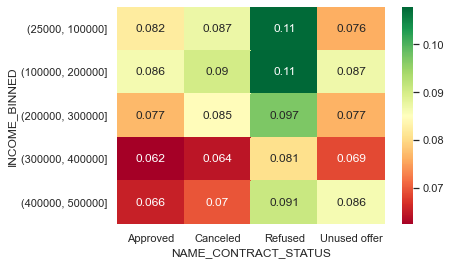

In [140]:
multi_heatmap(app_pre,'INCOME_BINNED','NAME_CONTRACT_STATUS')

Client whose previous loan application were refused/canceled are more likely to default.

#### Housing Type vs Contract Status

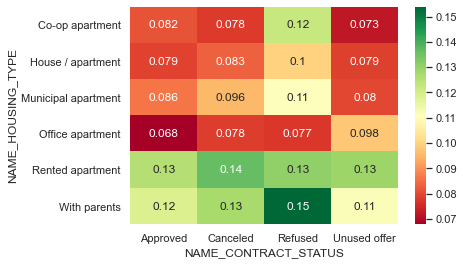

In [141]:
multi_heatmap(app_pre,'NAME_HOUSING_TYPE','NAME_CONTRACT_STATUS')

People living in office apartments and whose previous application was approved are less likely to default. So, they can be targeted by the banks to reduce the default rate.

#### Region Rating vs Contract Status

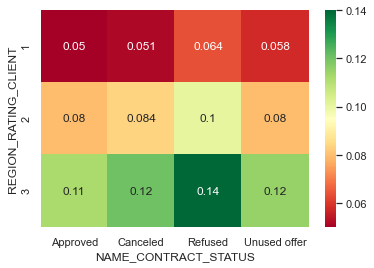

In [142]:
multi_heatmap(app_pre,'REGION_RATING_CLIENT','NAME_CONTRACT_STATUS')

Irrespective of previous application status client from region with rating 3 is more likely to default.

**Based on the analysis, we have identified the following driver variables which need to be considered by the banks before offering the loans.**
- AMT_INCOME_TOTAL
- AMT_ANNUITY & AMT_CREDIT
- DAYS_BIRTH (YEARS_BIRTH)
- EXT_SOURCE_2 & EXT_SOURCE_3
- OCCUPATION_TYPE
- REGION_RATING_CLIENT